# Анализ лояльности пользователей Яндекс Афиши

- Автор: Ильёв Никита
- Дата: 25.02.2026

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ поведения пользователей Яндекс Афиши для выявления факторов, повышающих вероятность их повторного возвращения на платформу.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Создание профиля пользователя по критериям ниже:
    - дату первого и последнего заказа;
    - устройство, с которого был сделан первый заказ;
    - регион, в котором был сделан первый заказ;
    - билетного партнёра, к которому обращались при первом заказе;
    - жанр первого посещённого мероприятия;
    - общее количество заказов;
    - средняя выручка с одного заказа в рублях;
    - среднее количество билетов в заказе;
    - среднее время между заказами.
    - совершил ли пользователь 2 и более заказа;
    - совершил ли пользователь 5 и более заказов.
4. Исследовательский анализ данных:
    - исследовать признаки первого заказа и их связи с возвращением на платформу;
    - исследовать поведение пользователей через показатели выручки и состава заказа;
    - исследовать временные характеристики первого заказа и их влияния на повторные покупки;
    - корреляционный анализ количества покупок и признаков пользователя.
5. Общие выводы и рекомендации.

### Описание данных

### Описание датасета из базы данных `data-analyst-afisha`

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа;
- `order_ts` — дата и время создания заказа;
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `event_name` - название мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

### Описание датасета `final_tickets_tenge_df.csv`

- `data` - дата, на которую актуален курс;
- `nominal` - для какого количества тенге представлен курс;
- `curs` - курс в рублях;
- `cdx` - название валюты.

### Содержимое проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы и рекомендации.

## Этапы выполнения проекта

### 1. Загрузка данных и их предобработка

---

**Задача 1.1:** Напишите SQL-запрос, выгружающий в датафрейм pandas необходимые данные. Используйте следующие параметры для подключения к базе данных `data-analyst-afisha`:

- **Хост** — `rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net`
- **База данных** — `data-analyst-afisha`
- **Порт** — `6432`
- **Аутентификация** — `Database Native`
- **Пользователь** — `praktikum_student`
- **Пароль** — `Sdf4$2;d-d30pp`

Для выгрузки используйте запрос из предыдущего урока и библиотеку SQLAlchemy.

Выгрузка из базы данных SQL должна позволить собрать следующие данные:

- `user_id` — уникальный идентификатор пользователя, совершившего заказ;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ (`mobile` — мобильные устройства, `desktop` — стационарные);
- `order_id` — уникальный идентификатор заказа;
- `order_dt` — дата создания заказа (используйте данные `created_dt_msk`);
- `order_ts` — дата и время создания заказа (используйте данные `created_ts_msk`);
- `currency_code` — валюта оплаты;
- `revenue` — выручка от заказа;
- `tickets_count` — количество купленных билетов;
- `days_since_prev` — количество дней от предыдущей покупки пользователя, для пользователей с одной покупкой — значение пропущено;
- `event_id` — уникальный идентификатор мероприятия;
- `service_name` — название билетного оператора;
- `event_type_main` — основной тип мероприятия (театральная постановка, концерт и так далее);
- `region_name` — название региона, в котором прошло мероприятие;
- `city_name` — название города, в котором прошло мероприятие.

---


In [139]:
# Используйте ячейки типа Code для вашего кода,
# а ячейки типа Markdown для комментариев и выводов

In [140]:
# При необходимости добавляйте новые ячейки для кода или текста

In [141]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix
from sqlalchemy import create_engine

In [142]:
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-afisha' # название базы данных
             }

In [143]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [144]:
engine = create_engine(connection_string)

In [145]:
query = '''
SELECT
user_id,
device_type_canonical,
order_id,
created_dt_msk AS order_dt,
created_ts_msk AS order_ts,
currency_code,
revenue,
tickets_count,
created_dt_msk::date - LAG(created_dt_msk::date) OVER (PARTITION BY user_id ORDER BY created_dt_msk) AS days_since_prev,
event_id,
event_name_code AS event_name,
event_type_main,
service_name,
region_name,
city_name
FROM afisha.purchases p
JOIN afisha.events e
USING(event_id)
LEFT JOIN afisha.city c
USING (city_id)
LEFT JOIN afisha.regions r
USING (region_id)
WHERE device_type_canonical IN ('mobile', 'desktop') AND event_type_main != 'фильм'
ORDER BY user_id
'''

*Загружаем датасет и делаем копию.*

In [146]:
df_originals = pd.read_sql_query(query, con=engine)

df_copy_orig = df_originals.copy()

---

**Задача 1.2:** Изучите общую информацию о выгруженных данных. Оцените корректность выгрузки и объём полученных данных.

Предположите, какие шаги необходимо сделать на стадии предобработки данных — например, скорректировать типы данных.

Зафиксируйте основную информацию о данных в кратком промежуточном выводе.

---

*Выводим общую информацию о датасете.*

In [147]:
df_copy_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

In [148]:
df_copy_orig.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк


*Фиксируем количество строк в изначальном датасете.*

In [149]:
a = len(df_copy_orig)

a

290611

Дата сет `data-analyst-afisha` содержит 15 столбцов и 290611 строк, в которых представлена информация о пользователях Яндекс Афиша.

1. Типы данных и их корректность:
    - **Строковые данные  (Object).** Восемь столбцов имеют тип данных `Object`:
        - `user_id`, `device_type_canonical`, `currency_code`, `event_name`, `event_type_main`, `service_name`, `region_name`, `city_name` В них хранятся нужные текстовые фрагменты: id с буквенными выражениями, название устройства, наименование валюты, название мероприятия, тип мероприятия, название билетного оператора, регион, город. Тип данных актуален.
    - **Числовые значения с плавающей запятой (float64).** Два столбца имеют тип данных `float64`:
        - `revenue`, `days_since_prev` содержат выручку и количество дней между покупками. Тип данных актуален, но возможно сокращение разрядности. 
    - **Числовые целые значения (int64).** Три столбца имеют тип данных `int64`:
        - `order_id`, `tickets_count`, `event_id` содержат идентификатор заказа, количество билетов, идентификатор мероприятия. Тип данных актуален, но возможно сокращение разрядности.
    - **Временные значения (datetime64[ns]).** Два столбца имеют тип `datetime64[ns]`:
        - `order_dt`, `order_ts` содержат дата создания заказа и дата и время создания заказа. Тип данных актуален.
2. Все столбцы написаны в формате snake case.
3. На первый взгляд, значения в столбцах соответствуют своему описанию.
4. Пропуски:
    - В столбце `days_since_prev` скорее всего, они связаны с пользователями, у которых одна покупка и с первым заказом.
    


Анализ данных показал о возможности сокращения разрядности в столбцах `revenue`, `days_since_prev`, `order_id`, `tickets_count`, `event_id`. В столбце `days_since_prev` есть пропуски, но, скорее всего, они обусловлены отсутствием повторных покупок и с полсденим заказом.

---

###  2. Предобработка данных

Выполните все стандартные действия по предобработке данных:

---

**Задача 2.1:** Данные о выручке сервиса представлены в российских рублях и казахстанских тенге. Приведите выручку к единой валюте — российскому рублю.

Для этого используйте датасет с информацией о курсе казахстанского тенге по отношению к российскому рублю за 2024 год — `final_tickets_tenge_df.csv`. Его можно загрузить по пути `https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv'`

Значения в рублях представлено для 100 тенге.

Результаты преобразования сохраните в новый столбец `revenue_rub`.

---


*Загружаем датасет с курсами.*

In [150]:
df_tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

*Проверяем данные* 

In [151]:
df_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


*Проверяем на дубликат.*

In [152]:
df_tenge.duplicated().sum()

np.int64(0)

In [153]:
df_tenge[['data', 'curs']].duplicated().sum()

np.int64(0)

- В датасете `final_tickets_tenge_df.csv` содержится 4 столбца и 357 строк.
- Пропуски отсутствуют.
- Столбец `data` имеет неправильный формат.
- Дубликаты не обнаружены.

*Приводим данные к нужному формату.*

In [154]:
df_tenge['data'] = pd.to_datetime(df_tenge['data'], errors='coerce')

*Проверяем результат.*

In [155]:
df_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int64         
 2   curs     357 non-null    float64       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [156]:
df_tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


*Объединяем два датасета в один и делаем копию.*

In [157]:
df_total_orig = pd.merge(df_copy_orig, df_tenge, left_on='order_dt', right_on='data', how='left')

In [158]:
df_total = df_total_orig.copy()

In [159]:
df_total.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,data,nominal,curs,cdx
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,Край билетов,Каменевский регион,Глиногорск,2024-08-20,100,18.6972,kzt
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,Мой билет,Каменевский регион,Глиногорск,2024-07-23,100,18.3419,kzt
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,За билетом!,Каменевский регион,Глиногорск,2024-10-06,100,19.6475,kzt
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,Лови билет!,Североярская область,Озёрск,2024-07-13,100,18.5010,kzt
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,Билеты без проблем,Озернинский край,Родниковецк,2024-10-04,100,19.6648,kzt


In [160]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290611 entries, 0 to 290610
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   user_id                290611 non-null  object        
 1   device_type_canonical  290611 non-null  object        
 2   order_id               290611 non-null  int64         
 3   order_dt               290611 non-null  datetime64[ns]
 4   order_ts               290611 non-null  datetime64[ns]
 5   currency_code          290611 non-null  object        
 6   revenue                290611 non-null  float64       
 7   tickets_count          290611 non-null  int64         
 8   days_since_prev        268678 non-null  float64       
 9   event_id               290611 non-null  int64         
 10  event_name             290611 non-null  object        
 11  event_type_main        290611 non-null  object        
 12  service_name           290611 non-null  obje

*Переводим тенге в рубли.*

In [161]:
df_total['revenue_rub'] = df_total.apply( lambda x: (x['revenue'] if x['currency_code'] == 'rub' else x['revenue'] * (x['curs'] / 100)), axis=1)

In [162]:
df_total[df_total['currency_code'] == 'kzt'].head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,data,nominal,curs,cdx,revenue_rub
70,0033403583a55ed,mobile,7850214,2024-09-17,2024-09-17 16:52:06,kzt,518.10,4,20.0,559919,f5ec2467-ee48-42f3-89a0-a2d90d1d6fce,другое,Билеты без проблем,Верхоречная область,Серебрянка,2024-09-17,100,19.0125,kzt,98.503762
89,0040e12d70fae81,desktop,8634925,2024-09-02,2024-09-02 19:49:14,kzt,347.18,3,39.0,559476,61ec7c0e-ea0c-4a3e-a63a-09cbe1bc6177,другое,Билеты без проблем,Верхоречная область,Серебрянка,2024-09-02,100,18.9330,kzt,65.731589
96,0054b38b2653e6e,mobile,7625522,2024-09-09,2024-09-09 18:06:04,kzt,328.77,4,NaN,559582,524f434e-0381-4f47-9688-7c4e41961b65,другое,Билеты без проблем,Верхоречная область,Серебрянка,2024-09-09,100,18.5991,kzt,61.148261
277,00f4f5244501ce6,mobile,720419,2024-06-11,2024-06-11 20:15:57,kzt,22021.55,5,NaN,536826,76af4f88-c554-4e9e-9df4-1cc8aeec8959,концерты,Мой билет,Верхоречная область,Серебрянка,2024-06-11,100,19.8928,kzt,4380.702898
460,01370a0e9c1a7d5,desktop,5227657,2024-06-04,2024-06-04 13:28:17,kzt,7397.66,4,1.0,533803,0686ac7b-6f3e-4177-bb73-16b54acd1223,концерты,Мой билет,Шанырский регион,Широковка,2024-06-04,100,19.9833,kzt,1478.296591


- Объединённый датасет имеет 19 столбцов, 290611 строк.
- Объединён параметром 'left' для сохранения всех данных в исходном `data-analyst-afisha`.

---

**Задача 2.2:**

- Проверьте данные на пропущенные значения. Если выгрузка из SQL была успешной, то пропуски должны быть только в столбце `days_since_prev`.
- Преобразуйте типы данных в некоторых столбцах, если это необходимо. Обратите внимание на данные с датой и временем, а также на числовые данные, размерность которых можно сократить.
- Изучите значения в ключевых столбцах. Обработайте ошибки, если обнаружите их.
    - Проверьте, какие категории указаны в столбцах с номинальными данными. Есть ли среди категорий такие, что обозначают пропуски в данных или отсутствие информации? Проведите нормализацию данных, если это необходимо.
    - Проверьте распределение численных данных и наличие в них выбросов. Для этого используйте статистические показатели, гистограммы распределения значений или диаграммы размаха.
        
        Важные показатели в рамках поставленной задачи — это выручка с заказа (`revenue_rub`) и количество билетов в заказе (`tickets_count`), поэтому в первую очередь проверьте данные в этих столбцах.
        
        Если обнаружите выбросы в поле `revenue_rub`, то отфильтруйте значения по 99 перцентилю.

После предобработки проверьте, были ли отфильтрованы данные. Если были, то оцените, в каком объёме. Сформулируйте промежуточный вывод, зафиксировав основные действия и описания новых столбцов.

---

*Меняем разрядность.*

In [163]:
df_total[['revenue', 'days_since_prev', 'curs', 'revenue_rub']] = df_total[['revenue', 'days_since_prev', 'curs', 'revenue_rub']].apply(pd.to_numeric, downcast='float')

df_total[['order_id', 'tickets_count', 'event_id', 'nominal']] = df_total[['order_id', 'tickets_count', 'event_id', 'nominal']].apply(pd.to_numeric, downcast='integer')

In [164]:
df_total.dtypes

user_id                          object
device_type_canonical            object
order_id                          int32
order_dt                 datetime64[ns]
order_ts                 datetime64[ns]
currency_code                    object
revenue                         float64
tickets_count                      int8
days_since_prev                 float32
event_id                          int32
event_name                       object
event_type_main                  object
service_name                     object
region_name                      object
city_name                        object
data                     datetime64[ns]
nominal                            int8
curs                            float32
cdx                              object
revenue_rub                     float64
dtype: object

*Проверяем пропуски.*

In [165]:
df_total.isna().sum()

user_id                      0
device_type_canonical        0
order_id                     0
order_dt                     0
order_ts                     0
currency_code                0
revenue                      0
tickets_count                0
days_since_prev          21933
event_id                     0
event_name                   0
event_type_main              0
service_name                 0
region_name                  0
city_name                    0
data                         0
nominal                      0
curs                         0
cdx                          0
revenue_rub                  0
dtype: int64

In [166]:
df_total.isna().mean()

user_id                  0.000000
device_type_canonical    0.000000
order_id                 0.000000
order_dt                 0.000000
order_ts                 0.000000
currency_code            0.000000
revenue                  0.000000
tickets_count            0.000000
days_since_prev          0.075472
event_id                 0.000000
event_name               0.000000
event_type_main          0.000000
service_name             0.000000
region_name              0.000000
city_name                0.000000
data                     0.000000
nominal                  0.000000
curs                     0.000000
cdx                      0.000000
revenue_rub              0.000000
dtype: float64

- Пропуски обнаружены только в столбце `days_since_prev`, что, скорее всего, обусловлено отсутствием повторных покупок и для последнего заказа.

*Проверяем пропуски.*

In [167]:
nan = df_total.groupby('user_id').agg(total_orders=('order_id', 'count'), count=('days_since_prev', lambda x: x.isna().sum())).reset_index()

In [168]:
nan[nan['count'] > 1]

,user_id,total_orders,count


In [169]:
df_total['user_id'].nunique()

21933

- Количество пропусков равно количеству пользователей.
- Больше одного пропуска нет ни у одного пользователя.

Подтверждается наличие пропусков у пользователей с одним заказом и для последнего заказа.

*Проверяем явные дубликаты.*

In [170]:
df_total.duplicated().sum()

np.int64(0)

- Явных дубликатов нет.

*Нормализуем данные в строковых столбцах.*

In [171]:
for x in df_total.columns:
    if df_total[x].dtype.name == 'object':
        df_total[x] = df_total[x].str.lower().str.strip()
        

In [172]:
df_total.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,data,nominal,curs,cdx,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,каменевский регион,глиногорск,2024-08-20,100,18.697201,kzt,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,мой билет,каменевский регион,глиногорск,2024-07-23,100,18.341900,kzt,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,за билетом!,каменевский регион,глиногорск,2024-10-06,100,19.647499,kzt,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,лови билет!,североярская область,озёрск,2024-07-13,100,18.500999,kzt,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,билеты без проблем,озернинский край,родниковецк,2024-10-04,100,19.664801,kzt,1390.41


*Проверяем явные и неявные дубликаты после нормализации.*

In [173]:
df_total.duplicated().sum()

np.int64(0)

In [174]:
df_total['order_id'].duplicated().sum()

np.int64(0)

In [175]:
df_total[['user_id', 'order_id', 'revenue_rub']].duplicated().sum()

np.int64(0)

In [176]:
df_total[['user_id', 'order_id', 'event_id']].duplicated().sum()

np.int64(0)

- Явных дубликатов не найдено.
- Неявных дубликатов не найдено.

*Проверяем уникальный значения.*

In [177]:
for x in df_total:
    display(df_total[x].value_counts(dropna=True).to_frame().sort_index())

,count
user_id,
0002849b70a3ce2,1
0005ca5e93f2cf4,2
000898990054619,3
00096d1f542ab2b,1
000a55a418c128c,2
...,...
fff13b79bd47d7c,9
fff32fc9ad0f9f6,2
fffcd3dde79eb2c,33


,count
device_type_canonical,
desktop,58121
mobile,232490


,count
order_id,
1,1
30,1
59,1
88,1
117,1
...,...
8652992,1
8653021,1
8653050,1


,count
order_dt,
2024-06-01,1102
2024-06-02,925
2024-06-03,1222
2024-06-04,1252
2024-06-05,1219
...,...
2024-10-27,2866
2024-10-28,2860
2024-10-29,2889


,count
order_ts,
2024-06-01 00:00:42,1
2024-06-01 00:01:30,1
2024-06-01 00:01:58,1
2024-06-01 00:03:13,1
2024-06-01 00:03:34,1
...,...
2024-10-31 23:58:55,1
2024-10-31 23:58:56,1
2024-10-31 23:59:24,1


,count
currency_code,
kzt,5069
rub,285542


,count
revenue,
-90.76,1
-17.94,1
-10.77,7
-8.53,2
-7.18,10
...,...
32469.82,25
43515.08,1
48704.72,19


,count
tickets_count,
1,41798
2,83807
3,92247
4,54812
5,13476
6,4283
7,62
8,21
9,38


,count
days_since_prev,
0.0,184052
1.0,30472
2.0,9947
3.0,6182
4.0,4410
...,...
144.0,4
145.0,3
146.0,6


,count
event_id,
4436,5
5785,2
8817,12
8849,19
8850,27
...,...
591313,1
591859,2
591877,1


,count
event_name,
000a9c8d-65bb-4178-a5a8-9ddc1f3bf71e,5
0015b11d-a3e0-4656-887a-383450a9b313,2
00298e1a-ae90-482b-819d-ba88ceff59b0,15
002c06bc-a677-4f50-9873-836ca0658603,64
002d57b9-d9ca-46a9-a4be-7b5c8685832e,12
...,...
ffe19736-c5f5-477d-ada2-e97cae12c51e,2
ffed72f8-faf6-4784-af94-a9f82839a272,1
fff20f2b-de72-451a-8168-b765352e502c,2


,count
event_type_main,
выставки,4854
другое,65867
концерты,115276
спорт,21911
стендап,13393
театр,67321
ёлки,1989


,count
service_name,
crazy ticket!,790
show_ticket,2200
билет по телефону,85
билеты без проблем,63519
билеты в интернете,4
билеты в руки,40343
быстробилет,2003
быстрый кассир,381
весь в билетах,16849


,count
region_name,
белоярская область,199
берестовский округ,395
берёзовская область,1282
боровлянский край,1721
верховинская область,50
...,...
шанырский регион,2882
широковская область,16457
яблоневская область,6181


,count
city_name,
айкольск,2
айсуак,1
акбастау,193
акбасты,513
акжолтау,12
...,...
ясногородин,26
ясноград,160
яснолесье,19


,count
data,
2024-06-01,1102
2024-06-02,925
2024-06-03,1222
2024-06-04,1252
2024-06-05,1219
...,...
2024-10-27,2866
2024-10-28,2860
2024-10-29,2889


,count
nominal,
100,290611


,count
curs,
17.848600,1436
17.899799,1564
17.929600,1416
18.015600,1579
18.024300,4038
...,...
19.983299,1252
20.039301,2904
20.042900,2889


,count
cdx,
kzt,290611


,count
revenue_rub,
-90.76,1
-17.94,1
-10.77,7
-8.53,2
-7.18,10
...,...
32469.82,25
43515.08,1
48704.72,19


- На первый взгляд, категориальные данные уникальны.
- В столбце `revenue_rub` есть отрицательные значения.

*Смотрим статистику по числовым столбцам.*

In [178]:
df_total[['revenue_rub']].describe().round(2)

,revenue_rub
count,290611.00
mean,555.57
std,875.50
min,-90.76
25%,113.97
50%,351.14
75%,802.05
max,81174.54


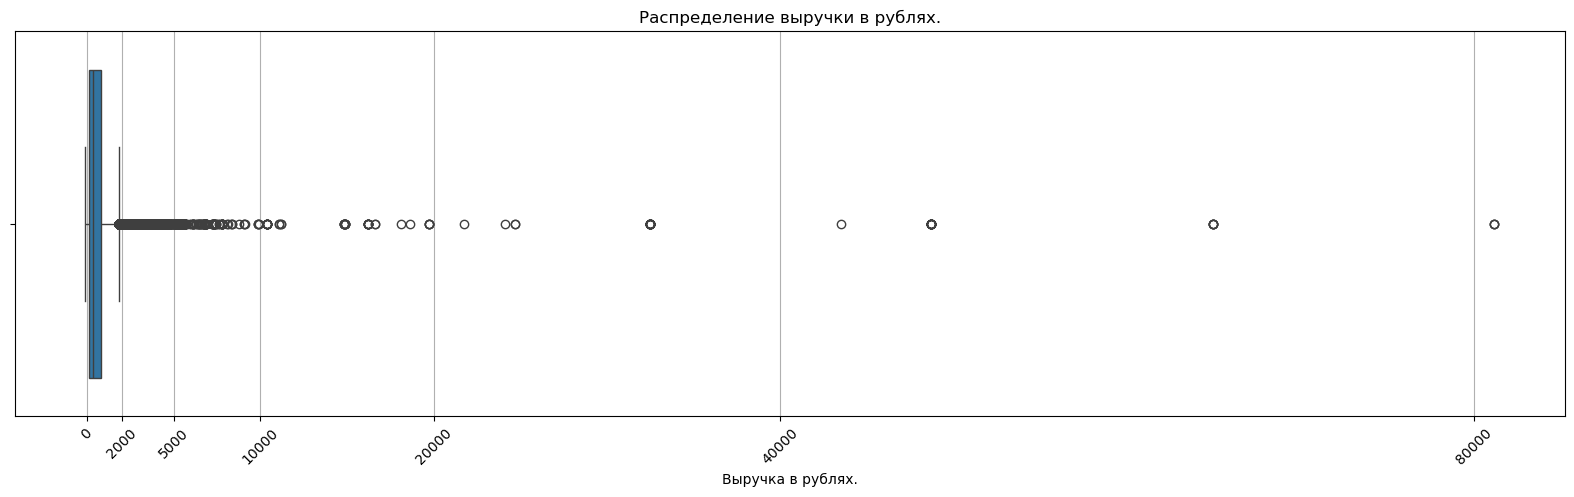

In [179]:
plt.figure(figsize=(20,5))

sns.boxplot(data=df_total, x='revenue_rub')

plt.grid(axis='x')
plt.xticks([0, 2000, 5000, 10000, 20000, 40000, 80000], rotation=45)
plt.title('Распределение выручки в рублях.')
plt.xlabel('Выручка в рублях.')

plt.show()

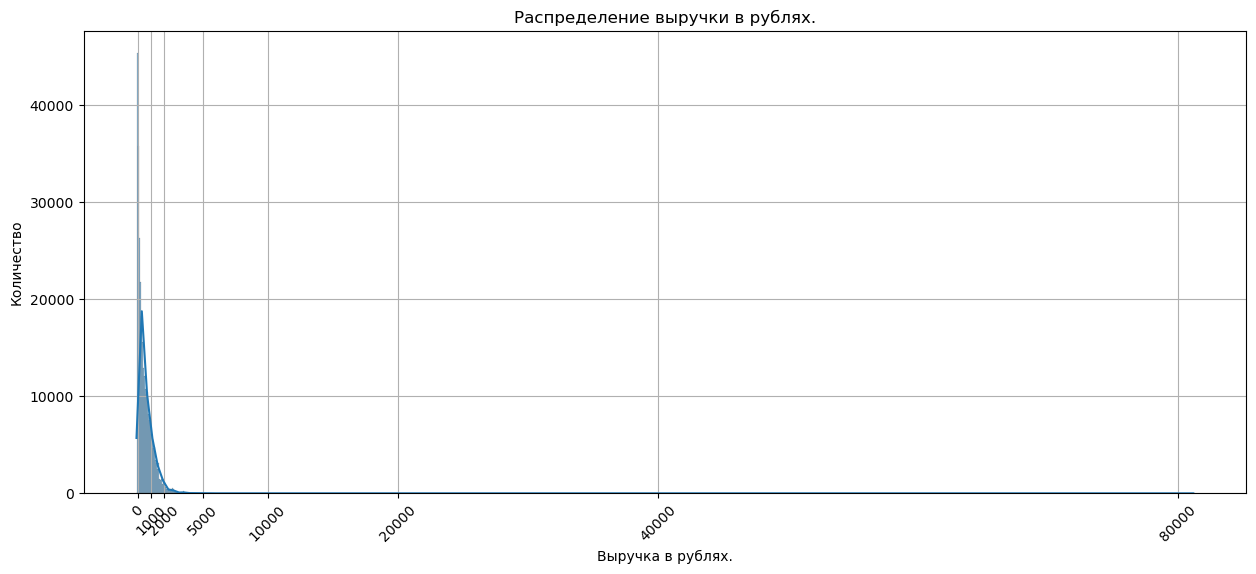

In [180]:
plt.figure(figsize=(15,6))

sns.histplot(data=df_total, x='revenue_rub', kde=True)

plt.grid(True)
plt.xticks([0, 1000, 2000, 5000, 10000, 20000, 40000, 80000], rotation=45)
plt.title('Распределение выручки в рублях.')
plt.xlabel('Выручка в рублях.')
plt.ylabel('Количество')

plt.show()

- Разница между медианой 351 и средним значением 555 показывает на смещение в право, что так же подтверждено на графике.
- Основное количество выбросов до 10000, но есть единичные выше 40000 и 80000.
- Основное количество значений примерно до 1000.
- Всё что полсе 2000, можно считать выбросами.

In [181]:
df_total[['tickets_count']].describe().round(2)

,tickets_count
count,290611.00
mean,2.75
std,1.17
min,1.00
25%,2.00
50%,3.00
75%,4.00
max,57.00


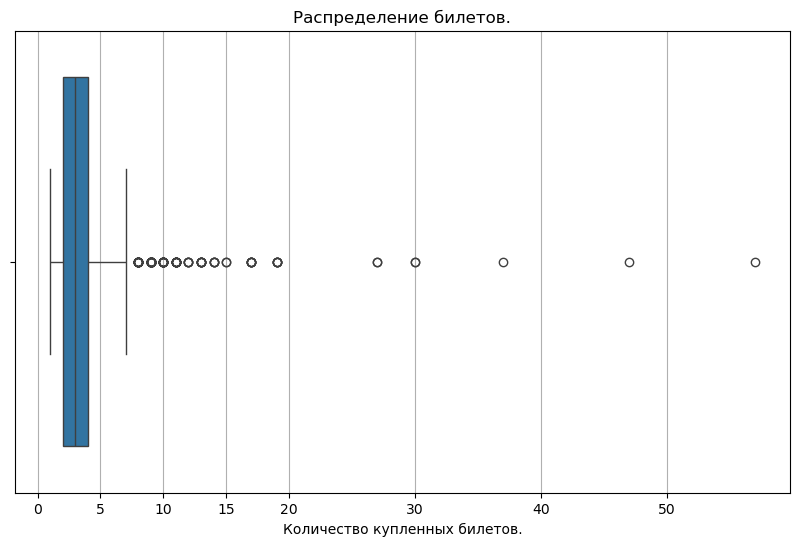

In [182]:
plt.figure(figsize=(10,6))

sns.boxplot(data=df_total, x='tickets_count')

plt.xticks([0, 5, 10, 15, 20, 30, 40, 50])
plt.grid(axis='x')
plt.title('Распределение билетов.')
plt.xlabel('Количество купленных билетов.')

plt.show()

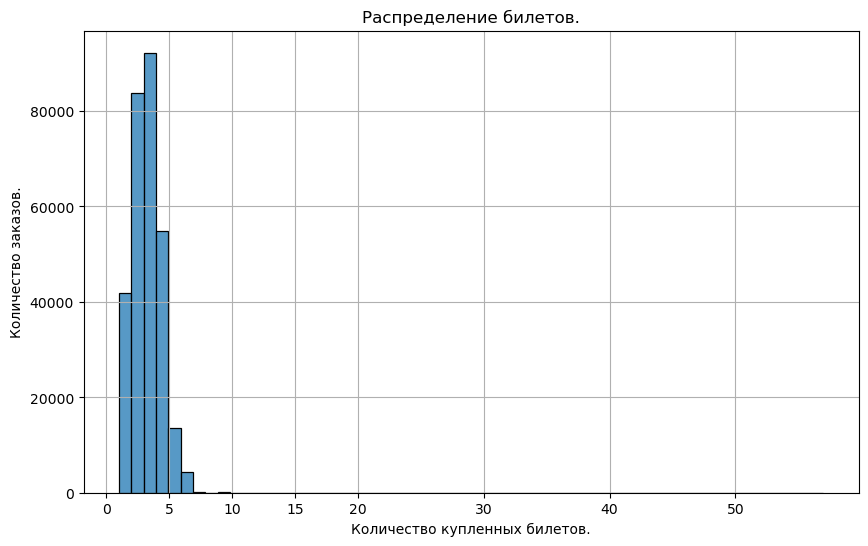

In [183]:
plt.figure(figsize=(10,6))

sns.histplot(data=df_total, x='tickets_count', bins=57)

plt.grid(True)
plt.xticks([0, 5, 10, 15, 20, 30, 40, 50])
plt.title('Распределение билетов.')
plt.xlabel('Количество купленных билетов.')
plt.ylabel('Количество заказов.')

plt.show()

- Заметно смещение вправо, что означает большие единичные выбросы.
- При медиане 3 есть большие единичные выбросы до 57.
- Всё, что примерно выше 8, можно считать выбросами.
- Основное количество покупателей берут до 3 билетов включительно.

In [184]:
df_total[['days_since_prev']].describe().round(2)


,days_since_prev
count,268678.00
mean,3.22
std,11.34
min,0.00
25%,0.00
50%,0.00
75%,1.00
max,148.00


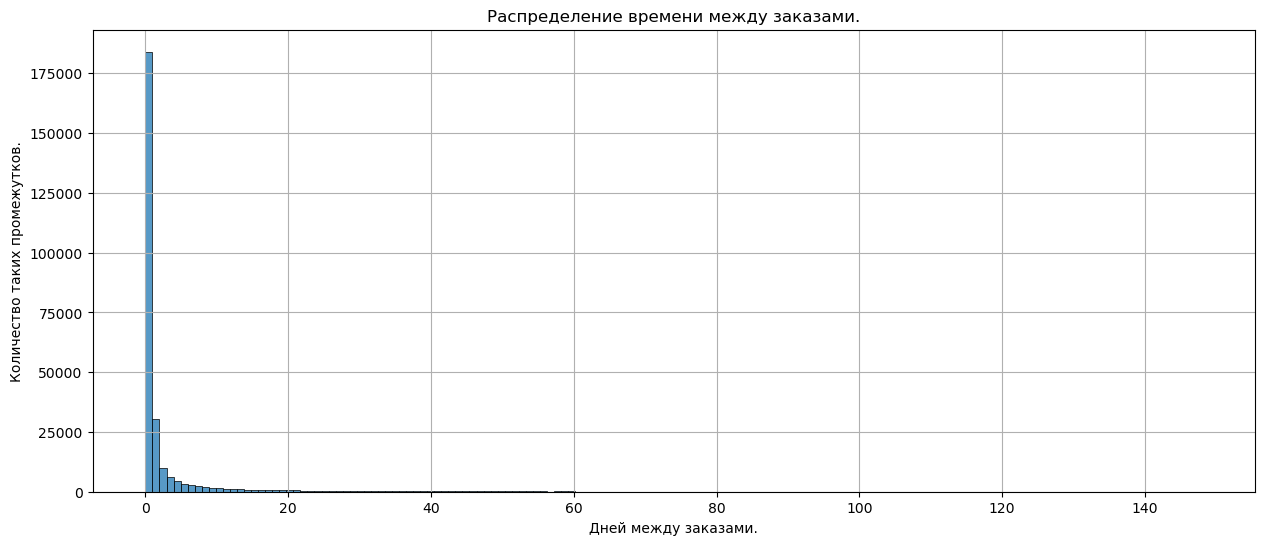

In [185]:
plt.figure(figsize=(15,6))

sns.histplot(data=df_total, x='days_since_prev', bins=150)

plt.grid(True)
plt.title('Распределение времени между заказами.')
plt.xlabel('Дней между заказами.')
plt.ylabel('Количество таких промежутков.')

plt.show()

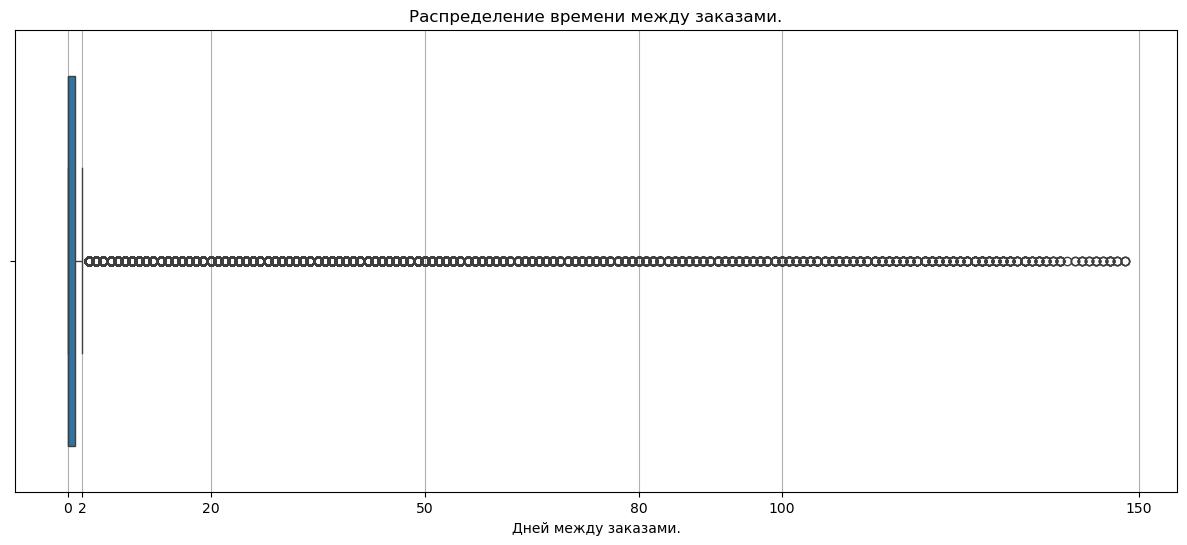

In [186]:
plt.figure(figsize=(15,6))

sns.boxplot(data=df_total, x='days_since_prev')

plt.xticks([0, 2, 20, 50, 80, 100, 150])
plt.grid(axis='x')
plt.title('Распределение времени между заказами.')
plt.xlabel('Дней между заказами.')

plt.show()

- Самый частый показатель - это повторные покупки в тот же день.
- Есть выбросы до 148 дней.
- Всё, что примерно больше 2-х дней, можно назвать нетипичными показателями.
- Стандартное отклонение очень высокое, что показывает о большом разбросе данных.

*Фильтруем по 99-му процентилю.*

In [187]:
df_total = df_total[df_total['revenue_rub'] <= df_total['revenue_rub'].quantile(0.99)]

In [188]:
df_total[['revenue_rub']].describe().round(2)

,revenue_rub
count,287786.00
mean,518.03
std,511.96
min,-90.76
25%,111.85
50%,343.85
75%,788.66
max,2628.42


*Проверяем разницу.*

In [189]:
b = len(df_total)

print(f'Строк до фильтрации: {a}. \n\nСтрок после фильтрации: {b}. \n\nОтфильтровано строк: {a - b}.')

Строк до фильтрации: 290611. 

Строк после фильтрации: 287786. 

Отфильтровано строк: 2825.


### Промежуточный вывод

В результате предобработки данных были выполнены следующие действия:

- Соединили датасеты `data-analyst-afisha`, `final_tickets_tenge_df.csv` для работы с курсами.
- Снизили разрядность данных в столбцах `order_id`, `tickets_count`, `days_since_prev`, `event_id `, `nominal`, `curs`.
- Привели текстовые данные к нижнему регистру и удалили пробелы.
- Конвертировали тенге в рубли и добавили новый столбец `revenue_rub` с типом данных `float64`, который отображает выручку в рублях.
- Явных и неявных дубликатов не обноружено.
- Пропуски обнаружены только в столбце `days_since_prev`, обусловленно пользователями с одним заказом и для последних заказов у других пользователей.
- Отфильтровали данные по 99-му процентилю в столбце `revenue_rub`.

**Анализ распределения численных данных**

- Столбец `revenue_rub`:
    - Основное количество выбросов до 10000, но есть единичные выше 40000 и 80000..
    - Всё что полсе 2000, можно считать выбросами.
- Столбец `tickets_count`:
    - При медиане 3 есть большие единичные выбросы до 57.
    - Всё, что примерно выше 8, можно считать выбросами.
- Столбец `days_since_prev`:
    - Есть выбросы до 148 дней.
    - Всё, что примерно больше 2-х дней, можно назвать нетипичными показателями.

**Размер датасета**

- Строк до фильтрации: 290611. 
- Строк после фильтрации: 287786. 
- Отфильтровано строк: 2825.

---

### 3. Создание профиля пользователя

В будущем отдел маркетинга планирует создать модель для прогнозирования возврата пользователей. Поэтому сейчас они просят вас построить агрегированные признаки, описывающие поведение и профиль каждого пользователя.

---

**Задача 3.1.** Постройте профиль пользователя — для каждого пользователя найдите:

- дату первого и последнего заказа;
- устройство, с которого был сделан первый заказ;
- регион, в котором был сделан первый заказ;
- билетного партнёра, к которому обращались при первом заказе;
- жанр первого посещённого мероприятия (используйте поле `event_type_main`);
- общее количество заказов;
- средняя выручка с одного заказа в рублях;
- среднее количество билетов в заказе;
- среднее время между заказами.

После этого добавьте два бинарных признака:

- `is_two` — совершил ли пользователь 2 и более заказа;
- `is_five` — совершил ли пользователь 5 и более заказов.

**Рекомендация:** перед тем как строить профиль, отсортируйте данные по времени совершения заказа.

---


*Сортируем по пользователю и времени заказа.*

In [190]:
df_total = df_total.sort_values(by=['user_id', 'order_ts']).reset_index(drop=True)

In [191]:
df_total.head()

,user_id,device_type_canonical,order_id,order_dt,order_ts,currency_code,revenue,tickets_count,days_since_prev,event_id,event_name,event_type_main,service_name,region_name,city_name,data,nominal,curs,cdx,revenue_rub
0,0002849b70a3ce2,mobile,4359165,2024-08-20,2024-08-20 16:08:03,rub,1521.94,4,NaN,169230,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,театр,край билетов,каменевский регион,глиногорск,2024-08-20,100,18.697201,kzt,1521.94
1,0005ca5e93f2cf4,mobile,7965605,2024-07-23,2024-07-23 18:36:24,rub,289.45,2,NaN,237325,40efeb04-81b7-4135-b41f-708ff00cc64c,выставки,мой билет,каменевский регион,глиногорск,2024-07-23,100,18.341900,kzt,289.45
2,0005ca5e93f2cf4,mobile,7292370,2024-10-06,2024-10-06 13:56:02,rub,1258.57,4,75.0,578454,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,другое,за билетом!,каменевский регион,глиногорск,2024-10-06,100,19.647499,kzt,1258.57
3,000898990054619,mobile,1139875,2024-07-13,2024-07-13 19:40:48,rub,8.49,2,NaN,387271,2f638715-8844-466c-b43f-378a627c419f,другое,лови билет!,североярская область,озёрск,2024-07-13,100,18.500999,kzt,8.49
4,000898990054619,mobile,972400,2024-10-04,2024-10-04 22:33:15,rub,1390.41,3,83.0,509453,10d805d3-9809-4d8a-834e-225b7d03f95d,стендап,билеты без проблем,озернинский край,родниковецк,2024-10-04,100,19.664801,kzt,1390.41


*Создаём профиль клиента.*

In [192]:
df_prof = df_total.groupby('user_id').agg(
    first_order_dt=('order_dt', 'min'),
    last_order_dt=('order_dt', 'max'), 
    first_device=('device_type_canonical', 'first'), 
    region_first_order=('region_name', 'first'), 
    first_service=('service_name', 'first'), 
    first_event=('event_type_main', 'first'), 
    total_orders=('order_id', 'count'), 
    avg_revenue_ryb=('revenue_rub', 'mean'), 
    avg_tickets=('tickets_count', 'mean'), 
    avg_days_between_orders=('days_since_prev', 'mean')).reset_index()

In [193]:
df_prof['is_two'] = df_prof['total_orders'] >= 2

df_prof['is_five'] = df_prof['total_orders'] >= 5

In [194]:
df_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21854 entries, 0 to 21853
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  21854 non-null  object        
 1   first_order_dt           21854 non-null  datetime64[ns]
 2   last_order_dt            21854 non-null  datetime64[ns]
 3   first_device             21854 non-null  object        
 4   region_first_order       21854 non-null  object        
 5   first_service            21854 non-null  object        
 6   first_event              21854 non-null  object        
 7   total_orders             21854 non-null  int64         
 8   avg_revenue_ryb          21854 non-null  float64       
 9   avg_tickets              21854 non-null  float64       
 10  avg_days_between_orders  13521 non-null  float32       
 11  is_two                   21854 non-null  bool          
 12  is_five                  21854 n

In [195]:
df_prof.head()

,user_id,first_order_dt,last_order_dt,first_device,region_first_order,first_service,first_event,total_orders,avg_revenue_ryb,avg_tickets,avg_days_between_orders,is_two,is_five
0,0002849b70a3ce2,2024-08-20,2024-08-20,mobile,каменевский регион,край билетов,театр,1,1521.940000,4.000000,NaN,False,False
1,0005ca5e93f2cf4,2024-07-23,2024-10-06,mobile,каменевский регион,мой билет,выставки,2,774.010000,3.000000,75.0,True,False
2,000898990054619,2024-07-13,2024-10-23,mobile,североярская область,лови билет!,другое,3,767.213333,2.666667,51.0,True,False
3,00096d1f542ab2b,2024-08-15,2024-08-15,desktop,каменевский регион,край билетов,театр,1,917.830000,4.000000,NaN,False,False
4,000a55a418c128c,2024-09-29,2024-10-15,mobile,поленовский край,лучшие билеты,театр,2,61.310000,1.500000,16.0,True,False


*Сокращаем разрядность числовых столбцов.*

In [196]:
for x in df_prof:
    if df_prof[x].dtype.kind == 'f':
        df_prof[x] = pd.to_numeric(df_prof[x], downcast='float') 
    elif df_prof[x].dtype.kind == 'i':
        df_prof[x] = pd.to_numeric(df_prof[x], downcast='integer')

In [197]:
df_prof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21854 entries, 0 to 21853
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  21854 non-null  object        
 1   first_order_dt           21854 non-null  datetime64[ns]
 2   last_order_dt            21854 non-null  datetime64[ns]
 3   first_device             21854 non-null  object        
 4   region_first_order       21854 non-null  object        
 5   first_service            21854 non-null  object        
 6   first_event              21854 non-null  object        
 7   total_orders             21854 non-null  int16         
 8   avg_revenue_ryb          21854 non-null  float32       
 9   avg_tickets              21854 non-null  float32       
 10  avg_days_between_orders  13521 non-null  float32       
 11  is_two                   21854 non-null  bool          
 12  is_five                  21854 n

- 13 столбцов, 21854 строк.
- Пропуски в `avg_days_between_orders` для пользователей без повторных заказов.

In [198]:
df_prof.duplicated().sum()

np.int64(0)

*Фиксируем изначальный размер датасета.*

In [199]:
a_prof = len(df_prof)

a_prof

21854

In [200]:
print(f'Строк после фильтрации 99-о процентиля: {b}. \n\nСтрок в новом датасете: {a_prof}. \n\nРазница: {b - a_prof}.')

Строк после фильтрации 99-о процентиля: 287786. 

Строк в новом датасете: 21854. 

Разница: 265932.


*Делаем копию.*

In [201]:
df = df_prof.copy()

- Новый датасет содержит 13 столбцов и 21854 строк.
    - Столбец `user_id` (`object`) индетефикатор пользователя.
    - Столбец `first_order_dt` (`datetime64[ns]`) дата первого заказа.	
    - Столбец `last_order_dt` (`datetime64[ns]`) дата последнего заказа.
    - Столбец `first_device` (`object`) устройство с которого был совершён первый заказ.	
    - Столбец `region_first_order` (`object`) регион первого заказа.
    - Столбец `first_service` (`object`) билетный оператор первого заказа.
    - Столбец `first_event` (`object`) категория мероприятия первого заказа.
    - Столбец `total_orders` (`int16`) общее количество совершённых заказов.
    - Столбец `avg_revenue_ryb`	(`float32`) средняя выручка.
    - Столбец `avg_tickets` (`float32`) среднее количество билетов в заказе.
    - Столбец `avg_days_between_orders` (`float32`) среднее количество дней между заказами.
    - Столбец `is_two` (`bool`) совершил ли пользователь 2 и более заказов.
    - Столбец `is_five` (`bool`) совершил ли пользователь 5 и более заказов.
- Пропуски в `avg_days_between_orders` для пользователей без повторных заказов и последних заказов.
- Сократили разрядность в столбцах `total_orders`, `avg_revenue_ryb`, `avg_tickets`, `avg_days_between_orders`.
- Разница строк от предыдушего датасета :
    - Строк после фильтрации 99-о процентиля: 287786. 
    - Строк в новом датасете: 21854. 
    - Разница: 265932.

---

**Задача 3.2.** Прежде чем проводить исследовательский анализ данных и делать выводы, важно понять, с какими данными вы работаете: насколько они репрезентативны и нет ли в них аномалий.

Используя данные о профилях пользователей, рассчитайте:

- общее число пользователей в выборке;
- среднюю выручку с одного заказа;
- долю пользователей, совершивших 2 и более заказа;
- долю пользователей, совершивших 5 и более заказов.

Также изучите статистические показатели:

- по общему числу заказов;
- по среднему числу билетов в заказе;
- по среднему количеству дней между покупками.

По результатам оцените данные: достаточно ли их по объёму, есть ли аномальные значения в данных о количестве заказов и среднем количестве билетов?

Если вы найдёте аномальные значения, опишите их и примите обоснованное решение о том, как с ними поступить:

- Оставить и учитывать их при анализе?
- Отфильтровать данные по какому-то значению, например, по 95-му или 99-му перцентилю?

Если вы проведёте фильтрацию, то вычислите объём отфильтрованных данных и выведите статистические показатели по обновлённому датасету.

In [202]:
print(f"""Количество пользователей: {len(df)}. 
Средняя выручка одного заказа: {df['avg_revenue_ryb'].sum() / df['total_orders'].sum():.2f}. 
Доля пользователей, совершивших 2 и более заказа: {df['is_two'].mean():.1%}.
Доля пользователей, совершивших 5 и более заказа: {df['is_five'].mean():.1%}""") 

Количество пользователей: 21854. 
Средняя выручка одного заказа: 41.34. 
Доля пользователей, совершивших 2 и более заказа: 61.7%.
Доля пользователей, совершивших 5 и более заказа: 29.0%


*Проверяем числовые столбцы.*

In [203]:
df[['total_orders']].describe().round(2)

,total_orders
count,21854.00
mean,13.17
std,121.67
min,1.00
25%,1.00
50%,2.00
75%,5.00
max,10181.00


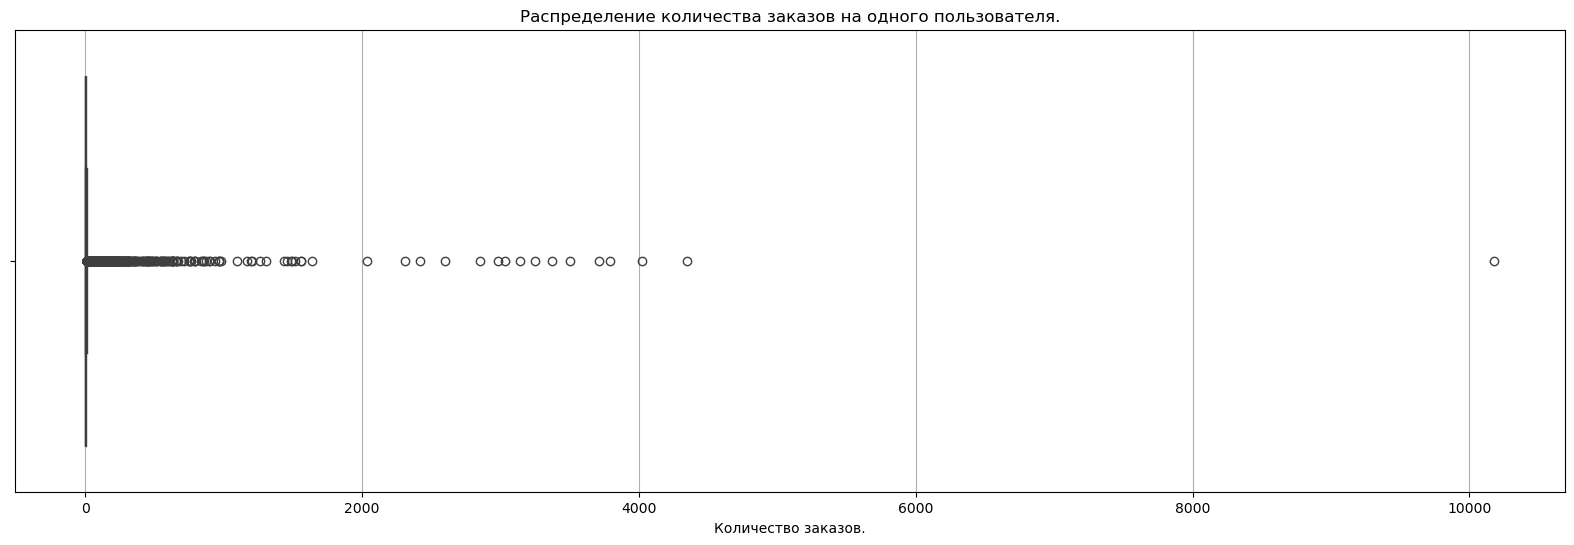

In [204]:
plt.figure(figsize=(20,6))

sns.boxplot(data=df, x='total_orders')

plt.grid(axis='x')
plt.title('Распределение количества заказов на одного пользователя.')
plt.xlabel('Количество заказов.')

plt.show()


- Большое значение стандартного отклонения 121 при средней 13 показывает на большой разброс данных.
- Разница между медианой 2 и средним 13 говорит о выбросах больших значений.
- Есть выбросы исчисляемые тысячами заказов.
- Возможно есть автоматизированные площадки для покупки билетов.
- Основные показатели до 5 заказов.

*Посмотрим на показатели при 95-м и 99-м процентиле.*

In [205]:
df[['total_orders']][df['total_orders'] <= df['total_orders'].quantile(0.95)].describe().round(2)

,total_orders
count,20761.00
mean,4.05
std,5.11
min,1.00
25%,1.00
50%,2.00
75%,5.00
max,31.00


- 95-й процентиль показывает более стабильные данные.
- Стандартное отклонение стало близко к среднему значению.
- Максимальный показатель 31 — реальная цифра для посещений мероприятий на одного человека за 5 месяца.

In [206]:
df[['total_orders']][df['total_orders'] <= df['total_orders'].quantile(0.99)].describe().round(2)

,total_orders
count,21638.00
mean,6.50
std,14.32
min,1.00
25%,1.00
50%,2.00
75%,5.00
max,152.00


- У 99-го процентиля разброс значений уменьшился относительно изначального, но всё же выше, чем в 95-м.
- Максимальное значение в 152 заказа выглядит менее вероятным для одного пользователя за 5 месяца.

Фильтруем по 95-му процентилю, который убирает выбросы и показывает более реальные и стабильные данные.

*Проверяем значения в количестве билетов.*

In [207]:
df[['avg_tickets']].describe().round(2)

,avg_tickets
count,21854.00
mean,2.74
std,0.91
min,1.00
25%,2.00
50%,2.75
75%,3.08
max,11.00


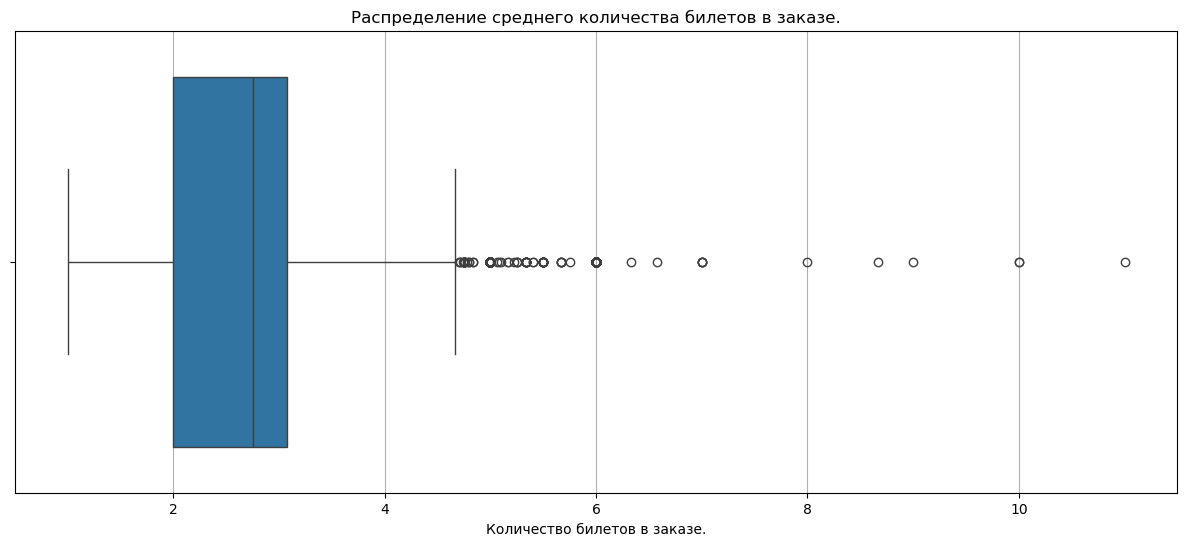

In [208]:
plt.figure(figsize=(15,6))

sns.boxplot(data=df, x='avg_tickets')

plt.grid(axis='x')
plt.title('Распределение среднего количества билетов в заказе.')
plt.xlabel('Количество билетов в заказе.')

plt.show()


- Стандартное отклонение довольно низкое, что говорит о сбалансированности данных.
- Средняя и медиана почти идентичны: 2.74 и 2.75 соответственно, что свидетельствует об отсутствии явного перекоса.
- Есть выбросы до 11 билетов, но в то же время вполне реальные цифры для этих данных.
- Данные выше 5-ти билетов можно считать выбивающимися из общей картины.
- Основная масса билетов лежит в плоскости от 2-х до 3-х.

*Проверяем значения в днях между заказами.*

In [209]:
df[['avg_days_between_orders']].describe().round(2)

,avg_days_between_orders
count,13521.00
mean,15.84
std,22.30
min,0.00
25%,1.00
50%,8.00
75%,20.40
max,148.00


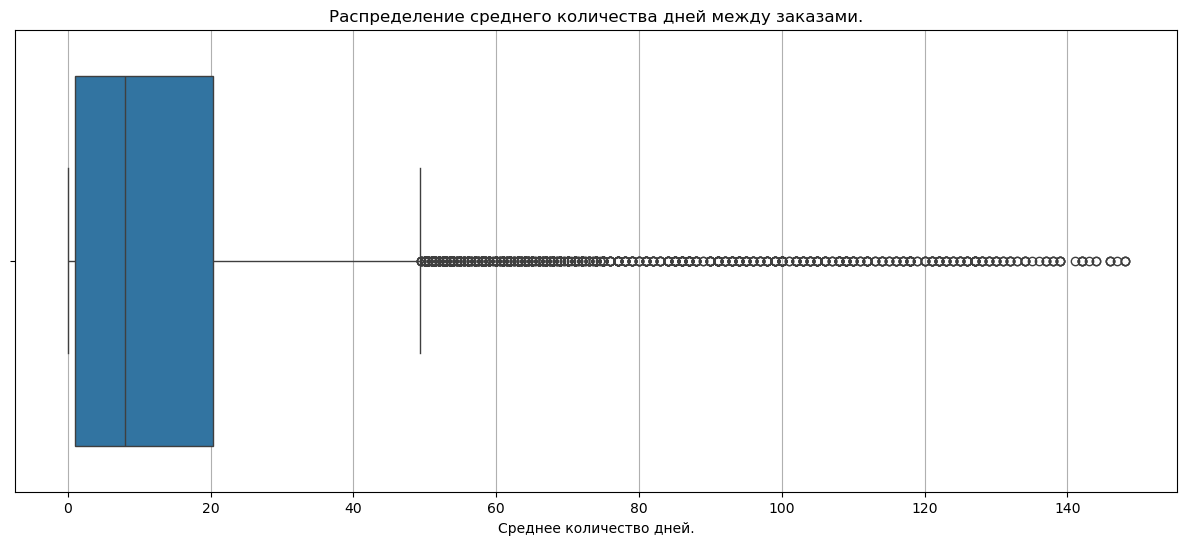

In [210]:
plt.figure(figsize=(15,6))

sns.boxplot(data=df, x='avg_days_between_orders')

plt.grid(axis='x')
plt.title('Распределение среднего количества дней между заказами.')
plt.xlabel('Среднее количество дней.')

plt.show()

- Довольно высокое стандартное отклонение 22.3, что указывает на большой разброс данных.
- Разница между средним 15.84 и медианой 8 говорит о перекосе в правую сторону с выбросами больших значений.
- Максимальное значение 148 дней, что в принципе укладывается в промежуток 5 месяцев.
- Значения больше 50-ти дней можно считать нетипичными.
- Основные показатели сконцентрированы до 20-ти дней.

**Промежуточный итог до фильтрации**

- Общие показатели:
    - Количество пользователей: 21854. 
    - Средняя выручка одного заказа: 41.34. 
    - Доля пользователей, совершивших 2 и более заказа: 61.7%.
    - Доля пользователей, совершивших 5 и более заказа: 29.0%
- Столбец `total_orders`:
    - Есть выбросы исчисляемые тысячами заказов.
    - Основные показатели до 5 заказов.
    - Фильтруем по 95-у процентилю по причине:
        - 95-й процентиль показывает более стабильные данные.
        - Стандартное отклонение стало близко к среднему значению.
        - Максимальный показатель 31 — реальная цифра для посещений мероприятий на одного человека за 5 месяца.
- Столбец `avg_tickets`:
    - Средняя и медиана почти идентичны: 2.74 и 2.75 соответственно, что свидетельствует об отсутствии явного перекоса.
    - Есть выбросы до 11 билетов, но в то же время вполне реальные цифры для этих данных.
    - Основная масса билетов лежит в плоскости от 2-х до 3-х.
- Столбец `avg_days_between_orders`:
    - Максимальное значение 148 дней, что в принципе укладывается в промежуток 5 месяцев.
    - Основные показатели сконцентрированы до 20-ти дней.

*Фильтруем датасет.*

In [211]:
df = df[df['total_orders'] <= df['total_orders'].quantile(0.95)]

*Смотрим на статистические показатели после фильтрации..*

In [212]:
df[['total_orders']].describe().round(2)

,total_orders
count,20761.00
mean,4.05
std,5.11
min,1.00
25%,1.00
50%,2.00
75%,5.00
max,31.00


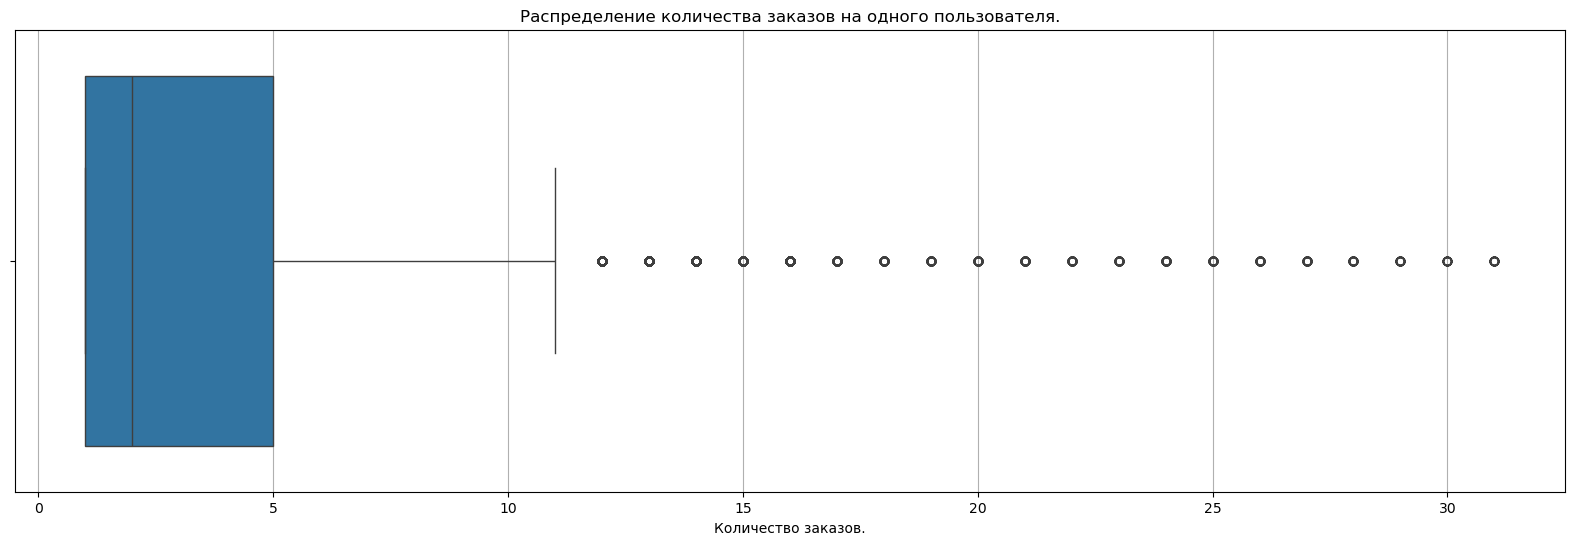

In [213]:
plt.figure(figsize=(20,6))

sns.boxplot(data=df, x='total_orders')

plt.grid(axis='x')
plt.title('Распределение количества заказов на одного пользователя.')
plt.xlabel('Количество заказов.')

plt.show()

- Стандартное отклонение 5 стало ближе к среднему значению, но всё равно показывает на довольно большой разброс данных.
- Среднее 4 и медиана 2 стали ближе, но всё ещё есть сдвиг в правую сторону.
- Максимальный показатель 31 — реальная цифра для посещений мероприятий на одного человека за 5 месяца.
- Основные значения до 5 заказов.
- Количество заказов примерно больше 11 можно считать нетипичными.

In [214]:
df[['avg_tickets']].describe().round(2)

,avg_tickets
count,20761.00
mean,2.74
std,0.93
min,1.00
25%,2.00
50%,2.75
75%,3.15
max,11.00


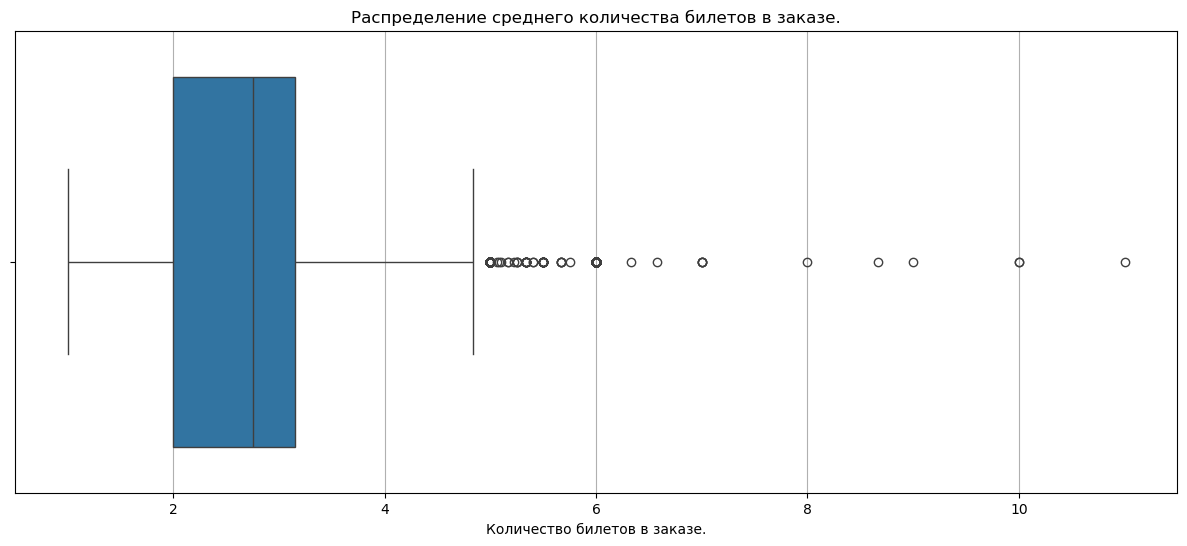

In [215]:
plt.figure(figsize=(15,6))

sns.boxplot(data=df, x='avg_tickets')

plt.grid(axis='x')
plt.title('Распределение среднего количества билетов в заказе.')
plt.xlabel('Количество билетов в заказе.')

plt.show()


- Стандартное отклонение 0.93 довольно низкое, что говорит о сбалансированности данных.
- Средняя и медиана почти идентичны: 2.74 и 2.75 соответственно, что свидетельствует об отсутствии явного перекоса.
- Есть выбросы до 11 билетов, но в то же время вполне реальные цифры для этих данных.
- Данные выше 5-ти билетов можно считать выбивающимися из общей картины.
- Основная масса билетов лежит в плоскости от 2-х до 3-х.

In [216]:
df[['avg_days_between_orders']].describe().round(2)

,avg_days_between_orders
count,12428.00
mean,17.04
std,22.87
min,0.00
25%,1.00
50%,9.46
75%,22.00
max,148.00


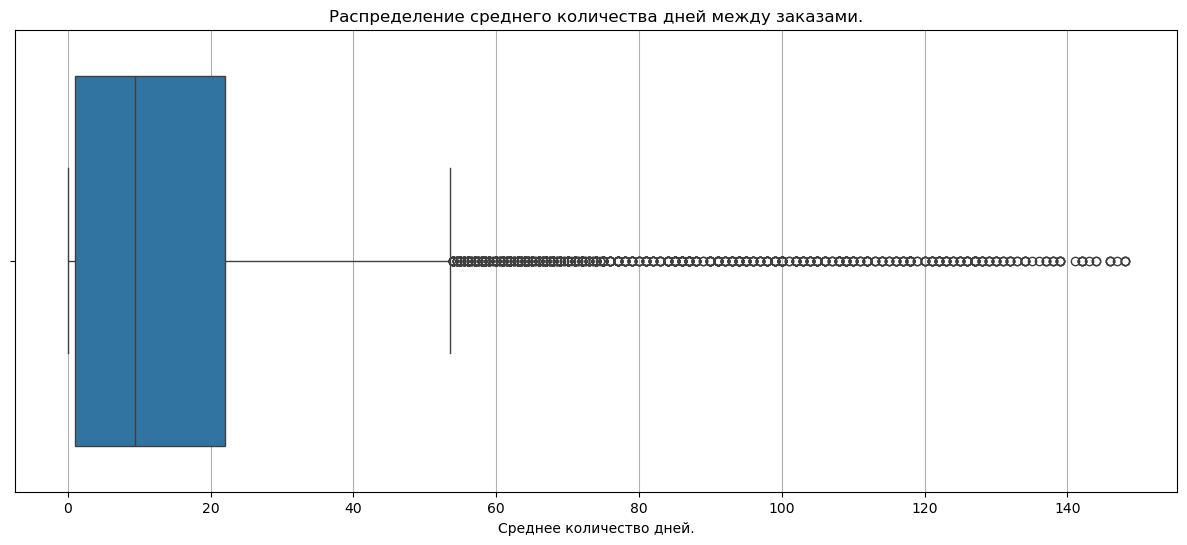

In [217]:
plt.figure(figsize=(15,6))

sns.boxplot(data=df, x='avg_days_between_orders')

plt.grid(axis='x')
plt.title('Распределение среднего количества дней между заказами.')
plt.xlabel('Среднее количество дней.')

plt.show()

- Довольно высокое стандартное отклонение 22.87, что указывает на большой разброс данных.
- Разница между средним 17 и медианой 9.46 говорит о перекосе в правую сторону с выбросами больших значений.
- Максимальное значение 148 дней, что в принципе укладывается в промежуток 5 месяцев.
- Значения больше 55-ти дней можно считать нетипичными.
- Основные показатели сконцентрированы до 22-ти дней.

In [218]:
print(f"""Количество пользователей: {len(df)}. 
Средняя выручка одного заказа: {df['avg_revenue_ryb'].sum() / df['total_orders'].sum():.2f}. 
Доля пользователей, совершивших 2 и более заказа: {df['is_two'].mean():.1%}.
Доля пользователей, совершивших 5 и более заказа: {df['is_five'].mean():.1%}""") 

Количество пользователей: 20761. 
Средняя выручка одного заказа: 135.00. 
Доля пользователей, совершивших 2 и более заказа: 59.7%.
Доля пользователей, совершивших 5 и более заказа: 25.3%


*Проверяем разницу в объёме датасета.*

In [219]:
b_prof = len(df)

print(f'Строк до фильтрации: {a_prof}. \nСтрок после фильтрации: {b_prof}. \nОтфильтровано строк: {a_prof - b_prof}.')

Строк до фильтрации: 21854. 
Строк после фильтрации: 20761. 
Отфильтровано строк: 1093.


**Промежуточный итог после фильтрации**

- Общие показатели:
    - Количество пользователей: 20761. 
    - Средняя выручка одного заказа: 135.00. 
    - Доля пользователей, совершивших 2 и более заказа: 59.7%.
    - Доля пользователей, совершивших 5 и более заказа: 25.3%
- Столбец `total_orders`:
    - Стандартное отклонение 5 стало ближе к среднему значению, но всё равно показывает на довольно большой разброс данных.
    - Среднее 4 и медиана 2 стали ближе, но всё ещё есть сдвиг в правую сторону.
    - Максимальный показатель 31 — реальная цифра для посещений мероприятий на одного человека за 5 месяца. Можно оставлять для расчётов.
    - Основные значения до 5 заказов.
    - Количество заказов примерно больше 11 можно считать нетипичными.
- Столбец `avg_tickets`:
    - Средняя и медиана почти идентичны: 2.74 и 2.75 соответственно, что свидетельствует об отсутствии явного перекоса.
    - Есть выбросы до 11 билетов, но в то же время вполне реальные цифры для этих данных. Можно оставлять для расчётов.
    - Основная масса билетов лежит в плоскости от 2-х до 3-х.
    - Данные почти не изменились.
- Столбец `avg_days_between_orders`:
    - Максимальное значение 148 дней, что в принципе укладывается в промежуток 5 месяцев. Можно оставлять для расчётов.
    - Значения больше 55-ти дней можно считать нетипичными.
    - Основные показатели сконцентрированы до 22-ти дней.
    - Разница между средним 17 и медианой 9.46 говорит о перекосе в правую сторону с выбросами больших значений.
- Новый датасет содержит 13 столбцов и 21854 строк.
    - Столбец `user_id` (`object`) индетефикатор пользователя.
    - Столбец `first_order_dt` (`datetime64[ns]`) дата первого заказа.	
    - Столбец `last_order_dt` (`datetime64[ns]`) дата последнего заказа.
    - Столбец `first_device` (`object`) устройство с которого был совершён первый заказ.	
    - Столбец `region_first_order` (`object`) регион первого заказа.
    - Столбец `first_service` (`object`) билетный оператор первого заказа.
    - Столбец `first_event` (`object`) категория мероприятия первого заказа.
    - Столбец `total_orders` (`int16`) общее количество совершённых заказов.
    - Столбец `avg_revenue_ryb`	(`float32`) средняя выручка.
    - Столбец `avg_tickets` (`float32`) среднее количество билетов в заказе.
    - Столбец `avg_days_between_orders` (`float32`) среднее количество дней между заказами.
    - Столбец `is_two` (`bool`) совершил ли пользователь 2 и более заказов.
    - Столбец `is_five` (`bool`) совершил ли пользователь 5 и более заказов.
- Пропуски в `avg_days_between_orders` для пользователей без повторных заказов и последних заказов.
- Сократили разрядность в столбцах `total_orders`, `avg_revenue_ryb`, `avg_tickets`, `avg_days_between_orders`.
- Размер датасета:
    - Строк до фильтрации: 21854. 
    - Строк после фильтрации: 20761. 
    - Отфильтровано строк: 1093.


---

### 4. Исследовательский анализ данных

Следующий этап — исследование признаков, влияющих на возврат пользователей, то есть на совершение повторного заказа. Для этого используйте профили пользователей.



#### 4.1. Исследование признаков первого заказа и их связи с возвращением на платформу

Исследуйте признаки, описывающие первый заказ пользователя, и выясните, влияют ли они на вероятность возвращения пользователя.

---

**Задача 4.1.1.** Изучите распределение пользователей по признакам.

- Сгруппируйте пользователей:
    - по типу их первого мероприятия;
    - по типу устройства, с которого совершена первая покупка;
    - по региону проведения мероприятия из первого заказа;
    - по билетному оператору, продавшему билеты на первый заказ.
- Подсчитайте общее количество пользователей в каждом сегменте и их долю в разрезе каждого признака. Сегмент — это группа пользователей, объединённых определённым признаком, то есть объединённые принадлежностью к категории. Например, все клиенты, сделавшие первый заказ с мобильного телефона, — это сегмент.
- Ответьте на вопрос: равномерно ли распределены пользователи по сегментам или есть выраженные «точки входа» — сегменты с наибольшим числом пользователей?

---


*Смотрим данные по мероприятиям.*

In [220]:
df['first_event'].value_counts().to_frame()

,count
first_event,
концерты,9188
другое,5175
театр,4068
стендап,1069
спорт,765
выставки,402
ёлки,94


In [221]:
event_share = df['first_event'].value_counts(normalize=True).to_frame('share_users')

event_share

,share_users
first_event,
концерты,0.442561
другое,0.249265
театр,0.195944
стендап,0.051491
спорт,0.036848
выставки,0.019363
ёлки,0.004528


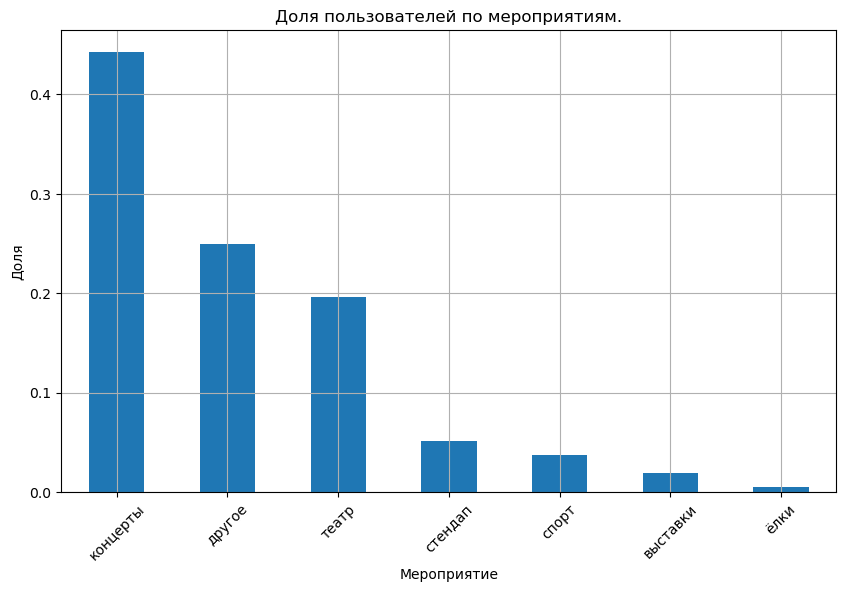

In [222]:
event_share.plot(kind='bar', rot=45, title='Доля пользователей по мероприятиям.', xlabel='Мероприятие', ylabel='Доля', figsize=(10,6), grid=True, legend=False)

plt.show()

- Больше всего пользователей выбирают концерты — 44%, другое — 25% и театр — 20%.
- Остальные категории не так популярны, все ниже 5%.

*Смотрим данные по типу устройств.*

In [223]:
df['first_device'].value_counts().to_frame()

,count
first_device,
mobile,17222
desktop,3539


In [224]:
device_share = df['first_device'].value_counts(normalize=True).to_frame('share_users')

device_share

,share_users
first_device,
mobile,0.829536
desktop,0.170464


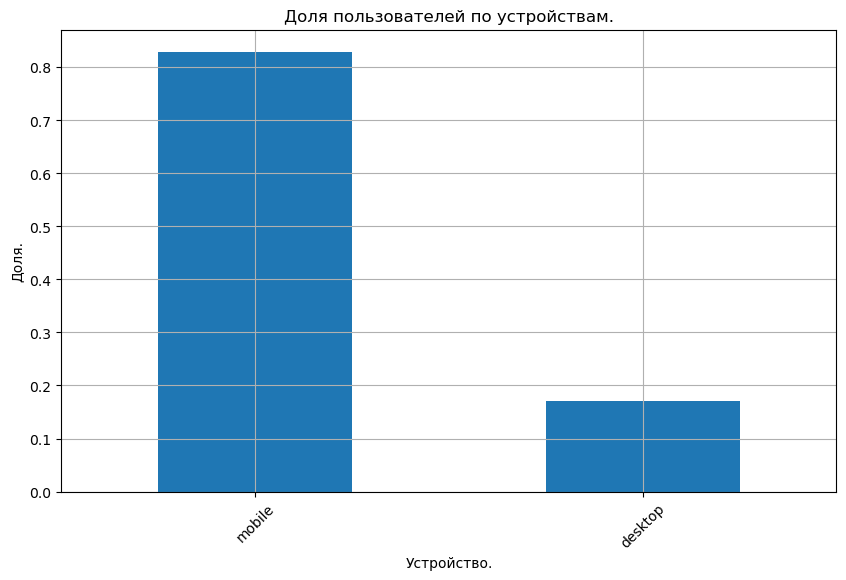

In [225]:
device_share.plot(kind='bar', rot=45, title='Доля пользователей по устройствам.', xlabel='Устройство.', ylabel='Доля.', figsize=(10,6), grid=True, legend=False)

plt.show()

- Преобралают пользователи с мобильных устройств 83%.

*Смотрим данные по регионам.*

In [226]:
df['region_first_order'].value_counts().to_frame()

,count
region_first_order,
каменевский регион,6780
североярская область,3598
широковская область,1184
озернинский край,660
малиновоярский округ,515
...,...
залесский край,2
сосноводолинская область,1
светолесский край,1


In [227]:
region_share = df['region_first_order'].value_counts(normalize=True).to_frame('share_users')

region_share

,share_users
region_first_order,
каменевский регион,0.326574
североярская область,0.173306
широковская область,0.057030
озернинский край,0.031790
малиновоярский округ,0.024806
...,...
залесский край,0.000096
сосноводолинская область,0.000048
светолесский край,0.000048


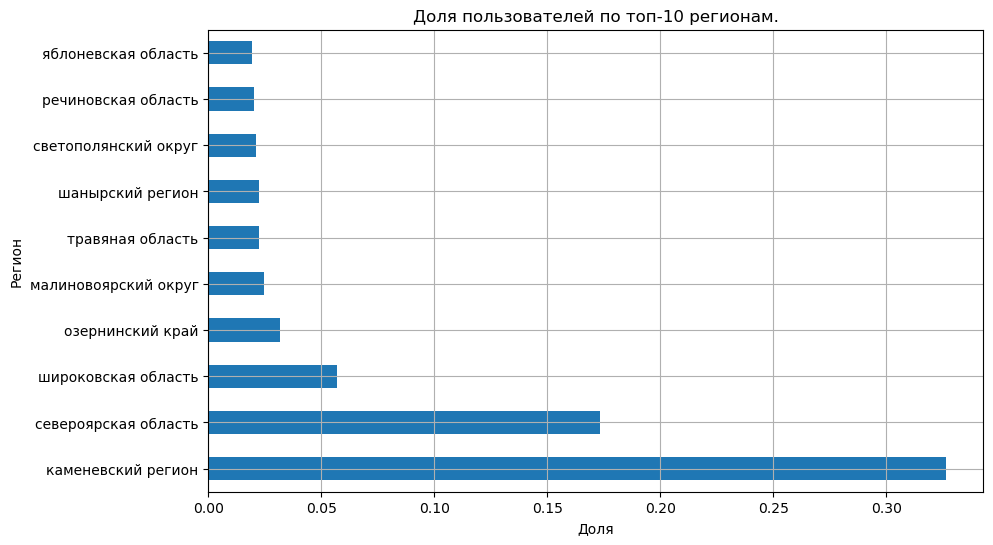

In [228]:
region_share.head(10).plot(kind='barh', title='Доля пользователей по топ-10 регионам.', xlabel='Доля', ylabel='Регион', figsize=(10,6), grid=True, legend=False)

plt.show()

- Значительно выбивается из массы Каменевский регион, на него приходится 33%.
- На Североярская область приходится 17%.
- Остальные регионы ниже 6%.

*Смотрим данные по билетным сервисам.*

In [229]:
df['first_service'].value_counts().to_frame()

,count
first_service,
билеты без проблем,4970
мой билет,2852
лови билет!,2707
билеты в руки,2426
облачко,2108
весь в билетах,1233
лучшие билеты,1132
прачечная,550
край билетов,438


In [230]:
service_share = df['first_service'].value_counts(normalize=True).to_frame('share_users')

service_share

,share_users
first_service,
билеты без проблем,0.239391
мой билет,0.137373
лови билет!,0.130389
билеты в руки,0.116854
облачко,0.101537
весь в билетах,0.059390
лучшие билеты,0.054525
прачечная,0.026492
край билетов,0.021097


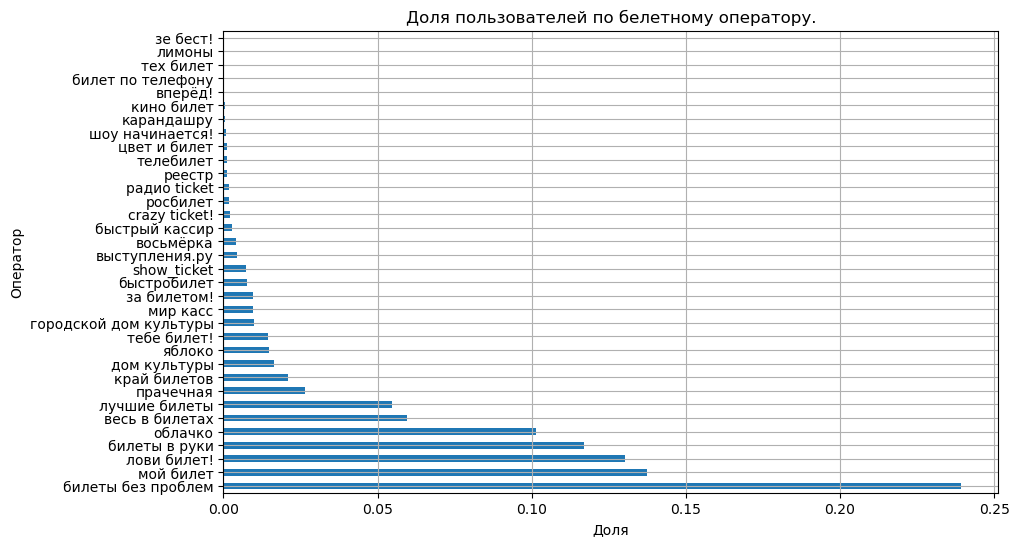

In [231]:
service_share.plot(kind='barh', title='Доля пользователей по белетному оператору.', xlabel='Доля', ylabel='Оператор', figsize=(10,6), grid=True, legend=False)

plt.show()

- Больше всего доля у 'Билеты без проблем' - 24%.
- Также в топ-5 входят 'Мой билет' - 14%, 'Лови билет!' - 13%, 'Билеты в руки' - 12%, 'Облачко' - 10%.
- Остальные операторы ниже 6%.

Во всех категориях есть явные лидеры по количеству пользователей.

- Мероприятия :
    - Лидеры: концерты — 44%, другое — 25% и театр — 20%. 
    - Остальные ниже 5%.
- Устройства :
    - Лидер:  мобильные устройства - 83%.
- Регионы :
    - Лидеры: Каменевский регион - 33%, Североярская область - 17%.
    - Остальные ниже 6%.
- Билетные операторы :
    - Лидеры: 'Билеты без проблем' - 24%, 'Мой билет' - 14%, 'Лови билет!' - 13%, 'Билеты в руки' - 12%, 'Облачко' - 10%.
    - Остальные ниже 6%.

---

**Задача 4.1.2.** Проанализируйте возвраты пользователей:

- Для каждого сегмента вычислите долю пользователей, совершивших два и более заказа.
- Визуализируйте результат подходящим графиком. Если сегментов слишком много, то поместите на график только 10 сегментов с наибольшим количеством пользователей. Такое возможно с сегментами по региону и по билетному оператору.
- Ответьте на вопросы:
    - Какие сегменты пользователей чаще возвращаются на Яндекс Афишу?
    - Наблюдаются ли успешные «точки входа» — такие сегменты, в которых пользователи чаще совершают повторный заказ, чем в среднем по выборке?

При интерпретации результатов учитывайте размер сегментов: если в сегменте мало пользователей (например, десятки), то доли могут быть нестабильными и недостоверными, то есть показывать широкую вариацию значений.

---


*Смотрим данные по мероприятиям.*

In [232]:
event_is_two = df.groupby('first_event')['is_two'].mean().round(2).to_frame('share_is_two').sort_values(by='share_is_two', ascending=False)

event_is_two

,share_is_two
first_event,
выставки,0.63
театр,0.62
концерты,0.60
стендап,0.59
другое,0.58
ёлки,0.55
спорт,0.54


*Соединяем для совместной визуализации.*

In [233]:
events = pd.merge(event_is_two, event_share, on='first_event', how='inner').sort_values(by='share_users', ascending=False).round(2)

In [234]:
events

,share_is_two,share_users
first_event,,
концерты,0.60,0.44
другое,0.58,0.25
театр,0.62,0.20
стендап,0.59,0.05
спорт,0.54,0.04
выставки,0.63,0.02
ёлки,0.55,0.00


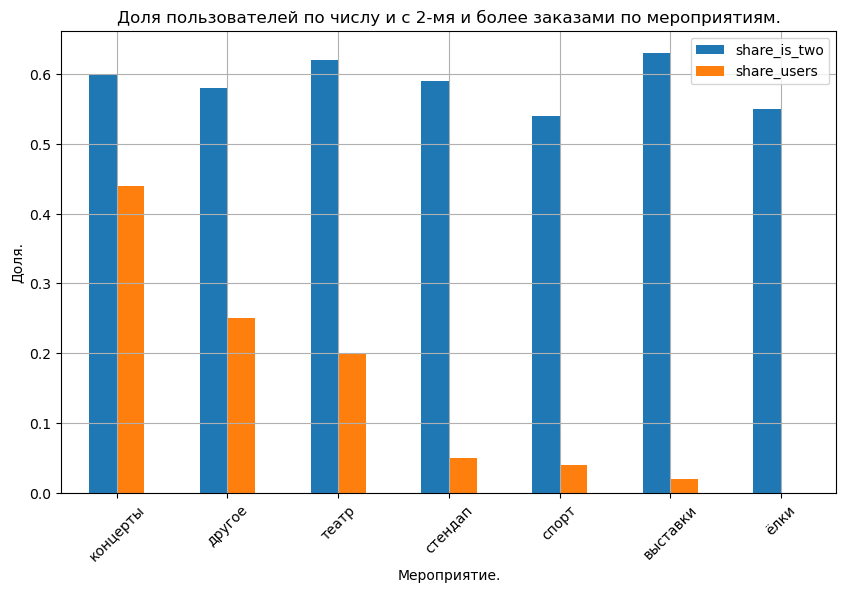

In [235]:
events.plot(kind='bar', title='Доля пользователей по числу и с 2-мя и более заказами по мероприятиям.', xlabel='Мероприятие.', ylabel='Доля.', rot=45, figsize=(10,6), grid=True)


plt.show()

- В целом у большинства сегментов показатель в районе 60%.
- Есть показатели в районе 55%, но в этих сегментах крайне низкая численность.
- Явных лидеров по повторным покупкам нет.

*Смотрим данные по устройствам.*

In [236]:
device_is_two = df.groupby('first_device')['is_two'].mean().round(2).to_frame().sort_values(by='is_two', ascending=False)

device_is_two


,is_two
first_device,
desktop,0.62
mobile,0.59


*Соединяем для совместной визуализации.*

In [237]:
device = pd.merge(device_is_two, device_share, on='first_device', how='inner').sort_values(by='share_users', ascending=False).round(2)

device

,is_two,share_users
first_device,,
mobile,0.59,0.83
desktop,0.62,0.17


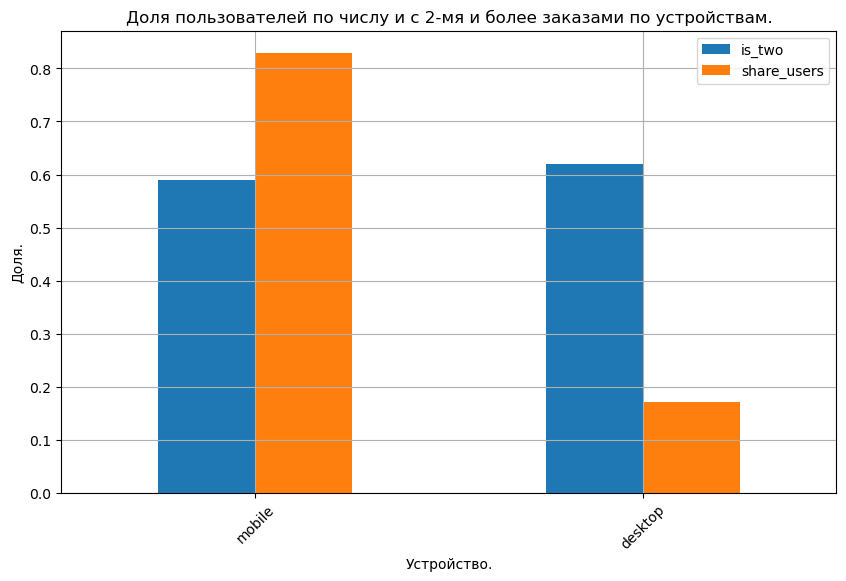

In [238]:
device.plot(kind='bar', title='Доля пользователей по числу и с 2-мя и более заказами по устройствам.', xlabel='Устройство.', ylabel='Доля.', rot=45, figsize=(10,6), grid=True)

plt.show()

- Показатели в районе 60%.
- Явного лидера нет.

*Смотрим данные по регионам.*

In [239]:
region_is_two = df.groupby('region_first_order')['is_two'].mean().to_frame().sort_values(by='is_two', ascending=False)

region_is_two

,is_two
region_first_order,
верхозёрский край,1.000000
озернопольская область,0.888889
радужнопольский край,0.761905
лесостепной край,0.690909
тихолесский край,0.666667
...,...
теплоозёрский округ,0.333333
сосноводолинская область,0.000000
островогорский округ,0.000000


*Соединяем для совместной визуализации.*

In [240]:
region_top_10_is_two = pd.merge(region_is_two, region_share, on='region_first_order', how='inner').sort_values(by='is_two', ascending=False).round(2).head(10)

region_top_10_is_two

,is_two,share_users
region_first_order,,
верхозёрский край,1.00,0.00
озернопольская область,0.89,0.00
радужнопольский край,0.76,0.00
лесостепной край,0.69,0.00
тихолесский край,0.67,0.00
лесноярский край,0.67,0.00
горноземский регион,0.65,0.00
ягодиновская область,0.65,0.00
шанырский регион,0.65,0.02


*Фильтруем по количеству пользователей.*

In [241]:
region = pd.merge(region_is_two, region_share, on='region_first_order', how='inner').sort_values(by='share_users', ascending=False).round(2).head(10)

region

,is_two,share_users
region_first_order,,
каменевский регион,0.61,0.33
североярская область,0.62,0.17
широковская область,0.63,0.06
озернинский край,0.54,0.03
малиновоярский округ,0.55,0.02
травяная область,0.60,0.02
шанырский регион,0.65,0.02
светополянский округ,0.64,0.02
речиновская область,0.62,0.02


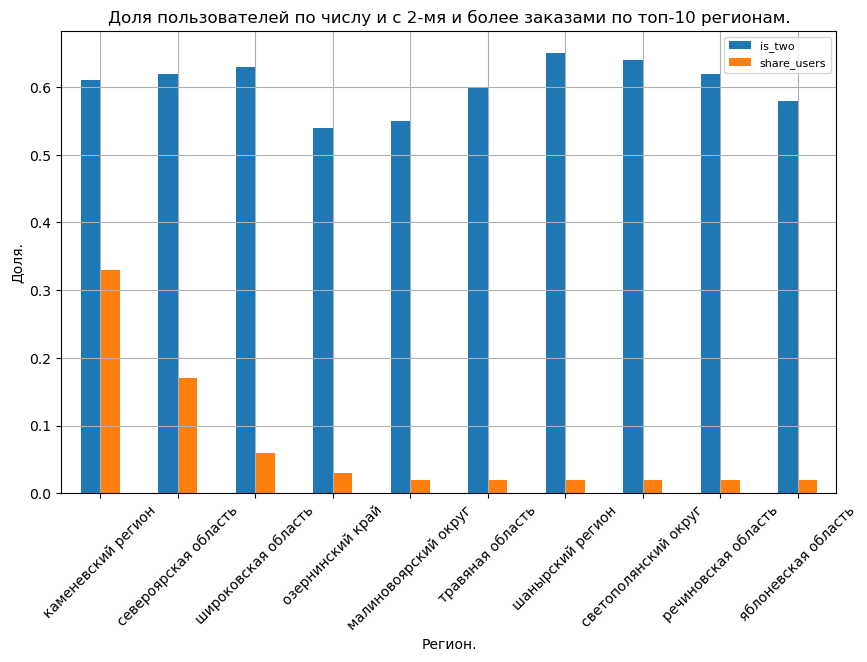

In [242]:
region.plot(kind='bar', title='Доля пользователей по числу и с 2-мя и более заказами по топ-10 регионам.', xlabel='Регион.', ylabel='Доля.', rot=45, figsize=(10,6), grid=True)

plt.legend(loc='upper right', fontsize=8)

plt.show()


- В ряде регионов есть показатели выше 64%, но они имеют минимальное количество пользователей.
- В топ-10 регионов показатель в районе 60%.
- Явных лидеров нет.

*Смотрим данные по билетным операторам.*

In [243]:
service_is_two = df.groupby('first_service')['is_two'].mean().to_frame().sort_values(by='is_two', ascending=False).round(2)

service_is_two

,is_two
first_service,
зе бест!,1.00
быстрый кассир,0.84
билет по телефону,0.83
реестр,0.78
восьмёрка,0.67
crazy ticket!,0.67
росбилет,0.65
show_ticket,0.64
край билетов,0.64


*Соединяем для совместной визуализации.*

In [244]:
service = pd.merge(service_is_two, service_share, on='first_service', how='inner').sort_values(by='is_two', ascending=False).round(2).head(10)

service

,is_two,share_users
first_service,,
зе бест!,1.00,0.00
быстрый кассир,0.84,0.00
билет по телефону,0.83,0.00
реестр,0.78,0.00
восьмёрка,0.67,0.00
crazy ticket!,0.67,0.00
росбилет,0.65,0.00
show_ticket,0.64,0.01
край билетов,0.64,0.02


*Фильтруем по количеству пользователей.*

In [245]:
service = pd.merge(service_is_two, service_share, on='first_service', how='inner').sort_values(by='share_users', ascending=False).round(2).head(10)

service

,is_two,share_users
first_service,,
билеты без проблем,0.59,0.24
мой билет,0.59,0.14
лови билет!,0.59,0.13
билеты в руки,0.61,0.12
облачко,0.60,0.10
весь в билетах,0.61,0.06
лучшие билеты,0.59,0.05
прачечная,0.60,0.03
край билетов,0.64,0.02


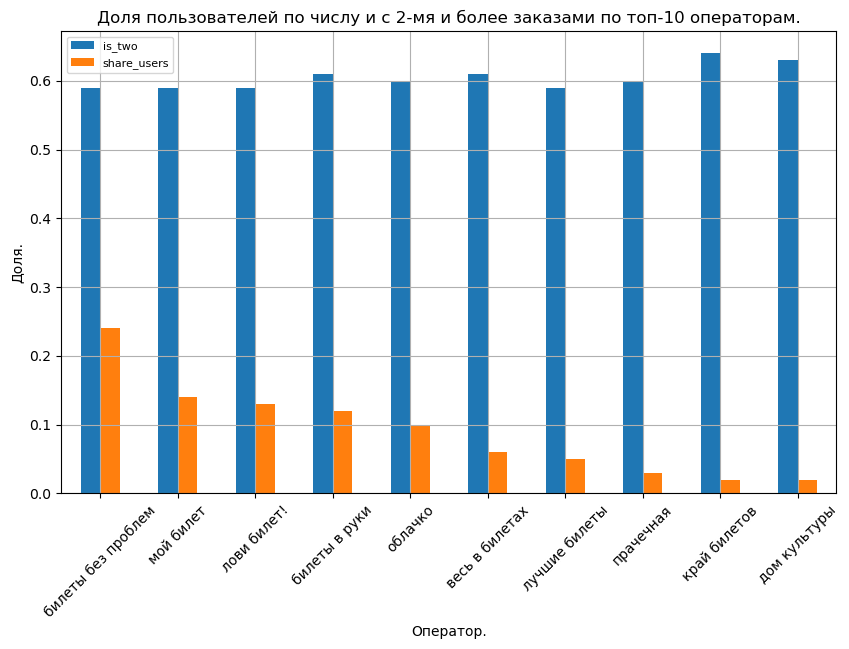

In [246]:
service.plot(kind='bar', title='Доля пользователей по числу и с 2-мя и более заказами по топ-10 операторам.', xlabel='Оператор.', ylabel='Доля.', rot=45, figsize=(10,6), grid=True)

plt.legend(loc='upper left', fontsize=8)

plt.show()

- У некоторых операторов есть показатели выше 65%, но они имеют минимальные значения по численности пользователей.
- В топ-10 операторов по численности пользователей показатель 2-х и более покупок в районе 60%.
- Явных лидеров нет.

- В целом во всех категориях показатель повторных покупок находится около 60%, явных лидеров по этому показателю не наблюдается.
- Есть сегменты, которые выбиваются как в большую, так и в меньшую сторону, но они характеризуются крайне минимальной численностью пользователей.

---

**Задача 4.1.3.** Опираясь на выводы из задач выше, проверьте продуктовые гипотезы:

- **Гипотеза 1.** Тип мероприятия влияет на вероятность возврата на Яндекс Афишу: пользователи, которые совершили первый заказ на спортивные мероприятия, совершают повторный заказ чаще, чем пользователи, оформившие свой первый заказ на концерты.
- **Гипотеза 2.** В регионах, где больше всего пользователей посещают мероприятия, выше доля повторных заказов, чем в менее активных регионах.

---

*Проверяем гипотезу №1.*

In [247]:
events

,share_is_two,share_users
first_event,,
концерты,0.60,0.44
другое,0.58,0.25
театр,0.62,0.20
стендап,0.59,0.05
спорт,0.54,0.04
выставки,0.63,0.02
ёлки,0.55,0.00


- Пользователи, которые выбрали концерт, имеют 60% повторных покупок.
- Пользователи, выбравшие спортивные мероприятия, имеют 54% повторных покупок.
- Следовательно, пользователи, которые предпочли концерт, совершают повторные покупки чаще.

Гипотеза не подтверждена. Хочу также обратить внимание на долю по количеству пользователей: 44% в сегменте концертов и 4% в сегменте спорта.

*Проверяем гипотезу №2.*

*Данные по топ-10 регионам по повторными покупками.*

In [248]:
region_top_10_is_two

,is_two,share_users
region_first_order,,
верхозёрский край,1.00,0.00
озернопольская область,0.89,0.00
радужнопольский край,0.76,0.00
лесостепной край,0.69,0.00
тихолесский край,0.67,0.00
лесноярский край,0.67,0.00
горноземский регион,0.65,0.00
ягодиновская область,0.65,0.00
шанырский регион,0.65,0.02


*Данные по топ-10 регионам по доле пользователей.*

In [249]:
region

,is_two,share_users
region_first_order,,
каменевский регион,0.61,0.33
североярская область,0.62,0.17
широковская область,0.63,0.06
озернинский край,0.54,0.03
малиновоярский округ,0.55,0.02
травяная область,0.60,0.02
шанырский регион,0.65,0.02
светополянский округ,0.64,0.02
речиновская область,0.62,0.02


- Видно, что в регионах с минимальным количеством пользователей доля от 64% до 100%.
- В регионах с большим количеством пользователей показатель в районе 60%.

Гипотеза не подтверждена.

Обе гипотезы не подтверждены.

Если смотреть в целом на картину, то можно сделать вывод: сегменты с наиболее большим числом пользователей показывают примерно одинаковые показатели повторных покупок во всех категориях, в то время как малочисленным сегментам присуща волатильность данных.

---

#### 4.2. Исследование поведения пользователей через показатели выручки и состава заказа

Изучите количественные характеристики заказов пользователей, чтобы узнать среднюю выручку сервиса с заказа и количество билетов, которое пользователи обычно покупают.

Эти метрики важны не только для оценки выручки, но и для оценки вовлечённости пользователей. Возможно, пользователи с более крупными и дорогими заказами более заинтересованы в сервисе и поэтому чаще возвращаются.

---

**Задача 4.2.1.** Проследите связь между средней выручкой сервиса с заказа и повторными заказами.

- Постройте сравнительные гистограммы распределения средней выручки с билета (`avg_revenue_rub`):
    - для пользователей, совершивших один заказ;
    - для вернувшихся пользователей, совершивших 2 и более заказа.
- Ответьте на вопросы:
    - В каких диапазонах средней выручки концентрируются пользователи из каждой группы?
    - Есть ли различия между группами?

Текст на сером фоне:
    
**Рекомендация:**

1. Используйте одинаковые интервалы (`bins`) и прозрачность (`alpha`), чтобы визуально сопоставить распределения.
2. Задайте параметру `density` значение `True`, чтобы сравнивать форму распределений, даже если число пользователей в группах отличается.

---


*Смотрим распределение выручки по одиночным и повторным покупкам.*

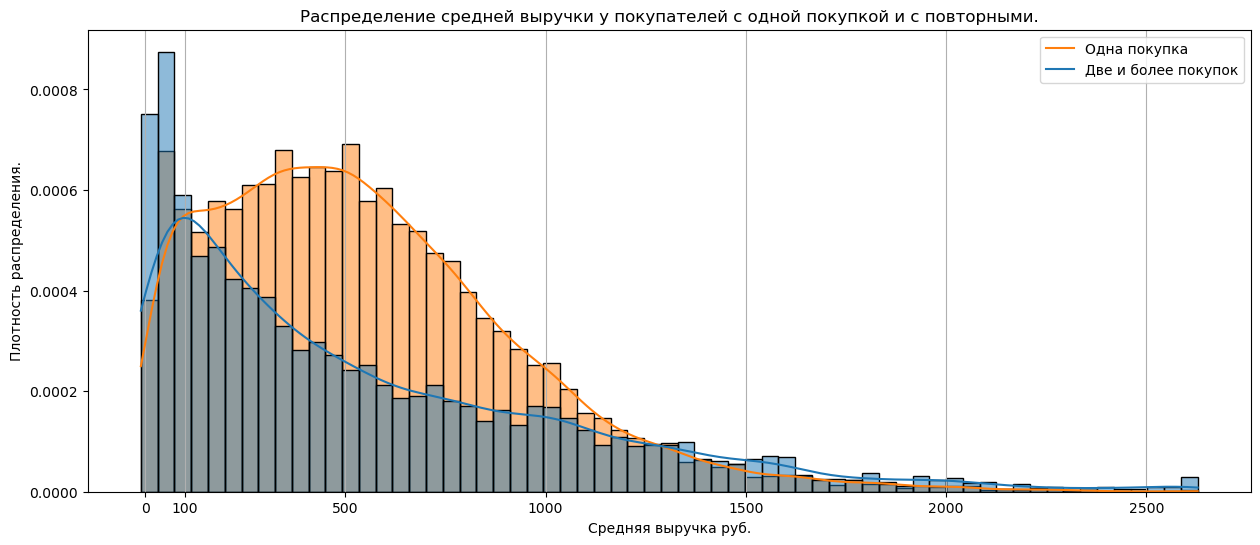

In [250]:
plt.figure(figsize=(15,6))


sns.histplot(data=df, x='avg_revenue_ryb', hue='is_two', stat='density', alpha=0.5, kde=True)

plt.title('Распределение средней выручки у покупателей с одной покупкой и с повторными.')
plt.xlabel('Средняя выручка руб.')
plt.ylabel('Плотность распределения.')
plt.legend(labels=(['Одна покупка', 'Две и более покупок']))
plt.grid(axis='x')
plt.xticks([0, 100, 500, 1000, 1500, 2000, 2500])

plt.show()

- Повторные пользователи :
    - Значения концентрируются в основном от 0 до 100.
    - Самые большие показатели в районе 50.
    - После 100 идёт планомерное снижение плотности.
- Пользователи с одной покупкой :
    - Значения равномерно распределяются в более высоком ценовом диапазоне, примерно от 50 до 500.
    - Мало пользователей с покупками до 50.
    - После 500 идёт снижение плотности.

- Повторные пользователи чаще совершают мелкие, но стабильные покупки. Это может быть связано с их привычками, небольшой группой посетителей и импульсными решениями.
- С другой стороны, единичные покупки обусловлены более высокой стоимостью. Это может указывать на долгосрочное планирование, например, приобретение билетов по акции для будущих мероприятий. Также возможны покупки билетов на массовые события, которые случаются реже, чем у небольших групп.

---

**Задача 4.2.2.** Сравните распределение по средней выручке с заказа в двух группах пользователей:

- совершившие 2–4 заказа;
- совершившие 5 и более заказов.

Ответьте на вопрос: есть ли различия по значению средней выручки с заказа между пользователями этих двух групп?

---


*Смотрим распределение выручки по 2-4 заказам и 5 и более.*

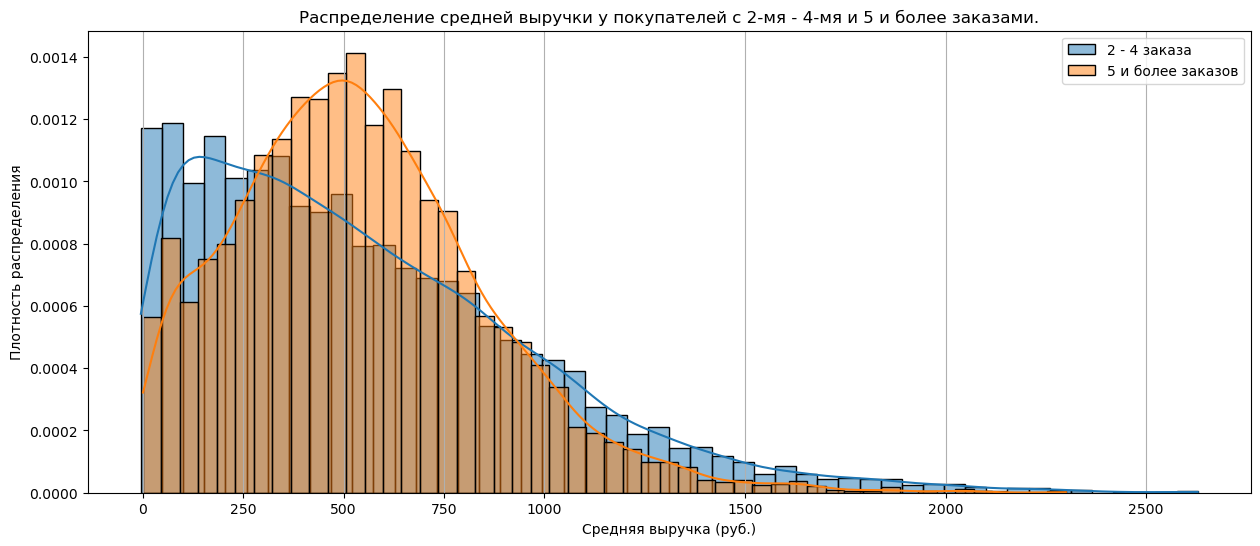

In [251]:
plt.figure(figsize=(15,6))

sns.histplot(data=df[(df['total_orders'] >= 2) & (df['total_orders'] <= 4)], x='avg_revenue_ryb', stat='density', alpha=0.5, bins=50, kde=True, label='2 - 4 заказа')


sns.histplot(data=df[df['total_orders'] >= 5], x='avg_revenue_ryb', stat='density', alpha=0.5, bins=50, kde=True, label='5 и более заказов')

plt.legend()
plt.title('Распределение средней выручки у покупателей с 2-мя - 4-мя и 5 и более заказами.')
plt.xlabel('Средняя выручка (руб.)')
plt.ylabel('Плотность распределения')
plt.xticks([0, 250, 500, 750, 1000, 1500, 2000, 2500])
plt.grid(axis='x')

plt.show()



- Пользователи с 2-4 заказами : 
    - основная плотность примерно от 0 до 200.
    - Видны пики в низкоценовом сегменте до 50.
    - После 250 начинается снижение.
- Пользователи с 5-ю и более заказами :
    - основная плотность примерно от 400 до 650.
    - Видны пики между 500 и 550.

---

**Задача 4.2.3.** Проанализируйте влияние среднего количества билетов в заказе на вероятность повторной покупки.

- Изучите распределение пользователей по среднему количеству билетов в заказе (`avg_tickets_count`) и опишите основные наблюдения.
- Разделите пользователей на несколько сегментов по среднему количеству билетов в заказе:
    - от 1 до 2 билетов;
    - от 2 до 3 билетов;
    - от 3 до 5 билетов;
    - от 5 и более билетов.
- Для каждого сегмента подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы.
- Ответьте на вопросы:
    - Как распределены пользователи по сегментам — равномерно или сконцентрировано?
    - Есть ли сегменты с аномально высокой или низкой долей повторных покупок?

---

*Смотрим распределение по среднему количеству билетов в заказе и вероятность повтороной покупки.*

In [252]:
df.groupby(pd.cut(
    df['avg_tickets'], bins=[1, 2, 3, 5, float('inf')], labels=['от 1 до 2 билетов', 'от 2 до 3 билетов', 'от 3 до 5 билетов', 'больше 5 билетов'], right=False), observed=True).agg(
        count_users=('is_two', 'size'), share_is_two=('is_two', 'mean')).sort_values(by='count_users', ascending=False).round(2)

,count_users,share_is_two
avg_tickets,,
от 3 до 5 билетов,8926,0.54
от 2 до 3 билетов,8759,0.71
от 1 до 2 билетов,2415,0.51
больше 5 билетов,661,0.19


- Два сегмента выбиваются из остальной группы по количеству пользователей: это 'от 3 до 5 билетов' (8926) и 'от 2 до 3 билетов' (8759).
- У сегментов 'от 1 до 2 билетов' и 'больше 5 билетов' 2415/661 пользователь соответственно.
- Самая большая доля повторных покупок у сегмента 'от 2 до 3 билетов' — 71%.
- Сегменты 'от 3 до 5 билетов' и 'от 1 до 2 билетов' имеют в районе 50%.
- Самая низкая доля — 19% — у сегмента 'больше 5 билетов'.

Можно подытожить, что самая высокая доля повторных покупок в сегменте 'от 2 до 3 билетов', также в этом сегменте достаточно много пользователей.

---

#### 4.3. Исследование временных характеристик первого заказа и их влияния на повторные покупки

Изучите временные параметры, связанные с первым заказом пользователей:

- день недели первой покупки;
- время с момента первой покупки — лайфтайм;
- средний интервал между покупками пользователей с повторными заказами.

---

**Задача 4.3.1.** Проанализируйте, как день недели, в которой была совершена первая покупка, влияет на поведение пользователей.

- По данным даты первого заказа выделите день недели.
- Для каждого дня недели подсчитайте общее число пользователей и долю пользователей, совершивших повторные заказы. Результаты визуализируйте.
- Ответьте на вопрос: влияет ли день недели, в которую совершена первая покупка, на вероятность возврата клиента?

---


*Смотрим распределение по дням недели первого заказа в количестве пользователей и доле повторных заказов.*

In [253]:
df.groupby(df['first_order_dt'].dt.day_name()).agg(count_users=('user_id', 'size'), share_is_two=('is_two', 'mean')).sort_values(by='count_users', ascending=False).round(2)

,count_users,share_is_two
first_order_dt,,
Friday,3166,0.59
Saturday,3122,0.60
Thursday,3027,0.58
Tuesday,3025,0.60
Wednesday,2960,0.61
Monday,2820,0.62
Sunday,2641,0.58


*Смотрим распределение в долях.*

In [254]:
df.groupby(df['first_order_dt'].dt.day_name()).agg(
    count_users=('user_id', lambda x: len(x) / len(df)), share_is_two=('is_two', 'mean')).sort_values(by='share_is_two', ascending=False).round(2)

,count_users,share_is_two
first_order_dt,,
Monday,0.14,0.62
Wednesday,0.14,0.61
Saturday,0.15,0.60
Tuesday,0.15,0.60
Friday,0.15,0.59
Thursday,0.15,0.58
Sunday,0.13,0.58


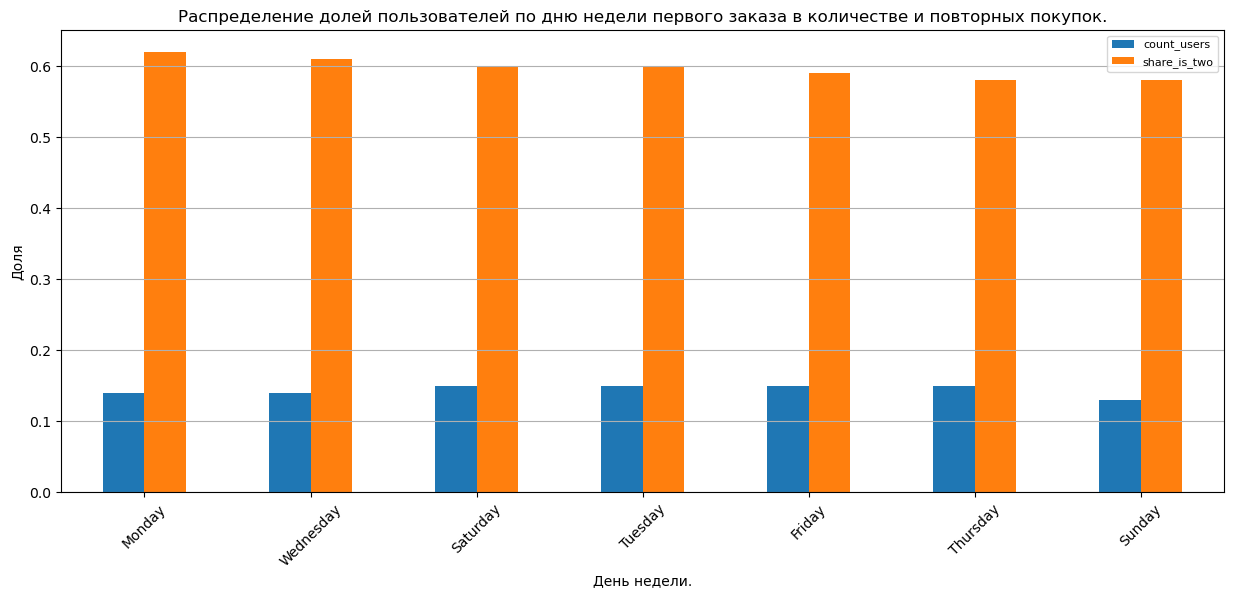

In [255]:
df.groupby(df['first_order_dt'].dt.day_name()).agg(
    count_users=('user_id', lambda x: len(x) / len(df)), share_is_two=('is_two', 'mean')).sort_values(by='share_is_two', ascending=False).round(2).plot(
        kind='bar', title='Распределение долей пользователей по дню недели первого заказа в количестве и повторных покупок.', figsize=(15,6), rot=45)
    
plt.grid(axis='y')
plt.xlabel('День недели.')
plt.ylabel('Доля')
plt.legend(fontsize=8)

plt.show()

- В целом распределение по количеству пользователей равномерно. Пятница и суббота в лидерах.
- Два последних места у понедельника и воскресенья.
- Доли повторных заказов в районе 60%, явных лидеров нет.


Количественное распределение логично, так как в пятницу и субботу пик активности развлечений, а в воскресенье и понедельник затишье.
С точки зрения посторных заказов, явных перекосов в какой-либо день нет.

---

**Задача 4.3.2.** Изучите, как средний интервал между заказами влияет на удержание клиентов.

- Рассчитайте среднее время между заказами для двух групп пользователей:
    - совершившие 2–4 заказа;
    - совершившие 5 и более заказов.
- Исследуйте, как средний интервал между заказами влияет на вероятность повторного заказа, и сделайте выводы.

---


*Смотрим на разницу в среднем количестве дней между заказами по сегментам.*

In [256]:
df.groupby(pd.cut(df['total_orders'], bins=[2, 5, float('inf')], labels=['2–4 заказа', '5 и более заказов'], right=False), observed=True)['avg_days_between_orders'].mean().round(2).to_frame()

,avg_days_between_orders
total_orders,
2–4 заказа,21.32
5 и более заказов,11.13


- Для сегмента '5 и более заказов' характерны более частые покупки интервал 11 дней.
- В то время как для сегмента '2–4 заказа', более редкие интервал 21 день, разница почти в два раза.

11 дней — вполне логичный срок для тех, кто раз в одну-две недели выбирается на события. Следовательно, он будет чаще возвращаться на площадку для поиска новых развлечений.

---

#### 4.4. Корреляционный анализ количества покупок и признаков пользователя

Изучите, какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок. Для этого используйте универсальный коэффициент корреляции `phi_k`, который позволяет анализировать как числовые, так и категориальные признаки.

---

**Задача 4.4.1:** Проведите корреляционный анализ:
- Рассчитайте коэффициент корреляции `phi_k` между признаками профиля пользователя и числом заказов (`total_orders`). При необходимости используйте параметр `interval_cols` для определения интервальных данных.
- Проанализируйте полученные результаты. Если полученные значения будут близки к нулю, проверьте разброс данных в `total_orders`. Такое возможно, когда в данных преобладает одно значение: в таком случае корреляционный анализ может показать отсутствие связей. Чтобы этого избежать, выделите сегменты пользователей по полю `total_orders`, а затем повторите корреляционный анализ. Выделите такие сегменты:
    - 1 заказ;
    - от 2 до 4 заказов;
    - от 5 и выше.
- Визуализируйте результат корреляции с помощью тепловой карты.
- Ответьте на вопрос: какие признаки наиболее связаны с количеством заказов?

---

*Смотрим на общую корреляцию по количеству заказов.*

In [257]:
phik_matrix = df[[
    'first_order_dt', 
    'last_order_dt', 
    'first_device', 
    'region_first_order', 
    'first_service', 
    'first_event', 
    'total_orders', 
    'avg_revenue_ryb', 
    'avg_tickets', 
    'avg_days_between_orders']].phik_matrix(
        interval_cols=['total_orders', 
                       'avg_revenue_ryb', 
                       'avg_tickets',
                       'avg_days_between_orders'])

In [258]:
heatmap_order = phik_matrix.loc[phik_matrix.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)

heatmap_order

,total_orders
avg_days_between_orders,0.490106
last_order_dt,0.399200
first_order_dt,0.398022
avg_tickets,0.296873
avg_revenue_ryb,0.265566
first_device,0.050118
first_service,0.038566
first_event,0.033819
region_first_order,0.000000


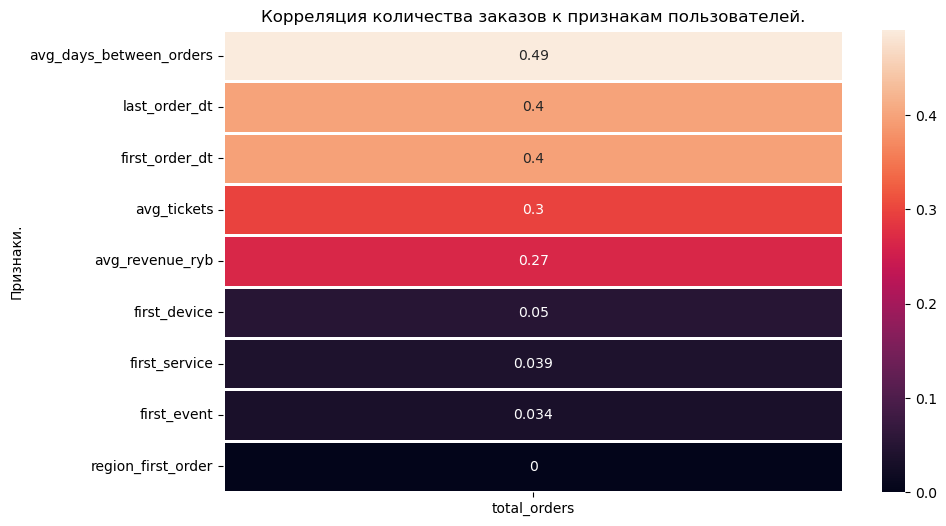

In [259]:
plt.figure(figsize=(10,6))

sns.heatmap(heatmap_order, annot=True, linewidths=1)

plt.title('Корреляция количества заказов к признакам пользователей.')
plt.ylabel('Признаки.')

plt.show()


- Самая большая взаимосвязь со средним количеством дней между покупками — 0,49.
- Также по 0,39 у последнего заказа и первого заказа.
- Почти не влияют на показатели тип устройства, мероприятие, билетный оператор и регион, у них меньше 0,05.

*Смотрим корреляцию в сегменте 2 - 4 заказа.*

In [260]:
phik_2_4 = df[(df['total_orders'] >= 2) & (df['total_orders'] <= 4)][[
    'first_order_dt', 
    'last_order_dt', 
    'first_device', 
    'region_first_order', 
    'first_service', 
    'first_event', 
    'total_orders', 
    'avg_revenue_ryb', 
    'avg_tickets', 
    'avg_days_between_orders']].phik_matrix(
        interval_cols=['total_orders', 
                       'avg_revenue_ryb', 
                       'avg_tickets',
                       'avg_days_between_orders'])

In [261]:
heatmap_2_4 = phik_2_4.loc[phik_2_4.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)

heatmap_2_4

,total_orders
avg_days_between_orders,0.384692
avg_tickets,0.369364
first_order_dt,0.233447
last_order_dt,0.166862
avg_revenue_ryb,0.108758
first_service,0.064842
first_device,0.009622
region_first_order,0.000000
first_event,0.000000


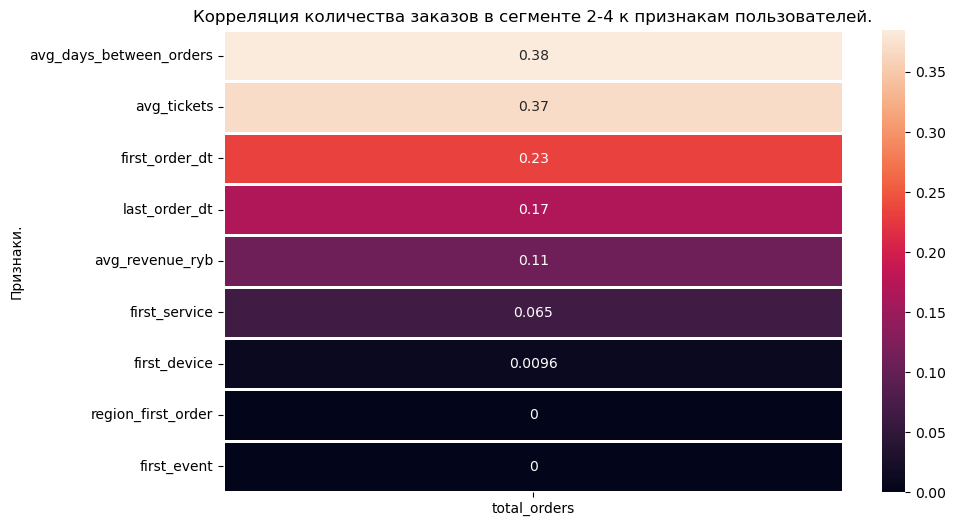

In [262]:
plt.figure(figsize=(10,6))

sns.heatmap(heatmap_2_4, annot=True, linewidths=1)

plt.title('Корреляция количества заказов в сегменте 2-4 к признакам пользователей.')
plt.ylabel('Признаки.')

plt.show()


- Самая большая взаимосвязь со средним количеством дней между покупками — 0,38 и количеством билетов 0,36.
- Дата первого заказа влияет больше, чем дата последнего, у них по 0,23 и 0,17 соответственно.
- Почти не влияют на показатели билетный оператор, тип устройства, регион и мероприятие, у них меньше 0,06.

*Смотрим корреляцию в сегменте 5 и более заказов.*

In [263]:
phik_5 = df[df['total_orders'] >= 5][[
    'first_order_dt', 
    'last_order_dt', 
    'first_device', 
    'region_first_order', 
    'first_service', 
    'first_event', 
    'total_orders', 
    'avg_revenue_ryb', 
    'avg_tickets', 
    'avg_days_between_orders']].phik_matrix(
        interval_cols=['total_orders', 
                       'avg_revenue_ryb', 
                       'avg_tickets',
                       'avg_days_between_orders'])
    

In [264]:
heat_map_5 = phik_5.loc[phik_5.index != 'total_orders'][['total_orders']].sort_values(by='total_orders', ascending=False)

heat_map_5

,total_orders
avg_days_between_orders,0.712525
first_order_dt,0.185664
avg_revenue_ryb,0.163305
avg_tickets,0.116416
region_first_order,0.079049
last_order_dt,0.070846
first_service,0.055470
first_event,0.052914
first_device,0.040003


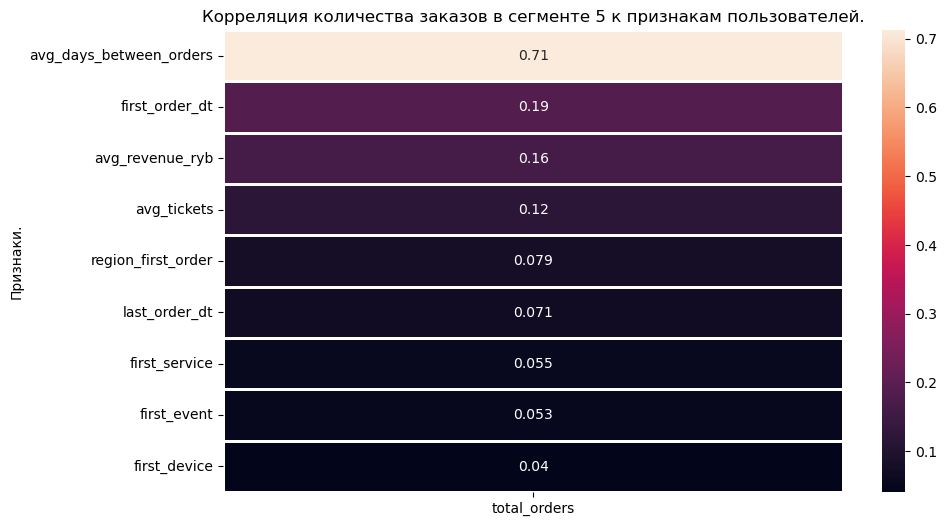

In [265]:
plt.figure(figsize=(10,6))

sns.heatmap(heat_map_5, annot=True, linewidths=1)

plt.title('Корреляция количества заказов в сегменте 5 к признакам пользователей.')
plt.ylabel('Признаки.')

plt.show()


- Самая большая взаимосвязь со средним количеством дней между покупками — 0,71 самая значимая среди остальных сегментов.
- Дальше идут дата первого заказа и средняя выручка: 0,18 и 0,16 соответственно.
- Почти не влияют на показатели билетный оператор, тип устройства, регион, мероприятие, дата последнего заказа — у них меньше 0,08.

*Смотрим корреляцию в сегменте 1 заказ.*

In [266]:
phik_1 = df[df['total_orders'] == 1][['first_device', 'region_first_order', 'first_service', 'first_event', 'avg_revenue_ryb', 'avg_tickets', 'avg_days_between_orders', 'total_orders']].phik_matrix(interval_cols=[ 'total_orders', 'avg_revenue_ryb', 'avg_tickets'])

c:\Users\79673\anaconda3\Lib\site-packages\phik\data_quality.py:72: UserWarning: Not enough unique value for variable total_orders for analysis 1. Dropping this column
  warnings.warn(


Не получается рассчитать данные по 1-му заказу, так как в строках присутствует лишь одно число.

- У всех трёх сегментов видна взаимосвязь со средним количеством дней между заказами. Самая большая связь у категории 5 и более билетов — 0,71.
- Дата первого и последнего заказа находится в топе связей почти у всех сегментов. Вероятно, чем дольше интервал между этими датами, тем выше шанс, что пользователь закажет дополнительные билеты.
- Тип устройства, оператор, категория мероприятия почти не влияют и имеют минимальные связи.

**Категория с 1 заказом :**

Нельзя построить данные взаимосвязей, так как присутствует лишь одно значение. Возможно, стоит проанализировать в дальнейшем на предмет, какие пользователи с течением времени сделали повторный заказ и что на это повлияло.

## Итог исследовательского анализа данных.

- #### Признаки первого заказа и их связи с возвращением на платформу :
    - Доля пользователей по признаку первого заказа :
        - Мероприятия :
            - Лидеры: концерты — 44%, другое — 25% и театр — 20%. 
            - Остальные ниже 5%.
        - Устройства :
            - Лидер:  мобильные устройства - 83%.
        - Регионы :
            - Лидеры: Каменевский регион - 33%, Североярская область - 17%.
            - Остальные ниже 6%.
        - Билетные операторы :
            - Лидеры: 'Билеты без проблем' - 24%, 'Мой билет' - 14%, 'Лови билет!' - 13%, 'Билеты в руки' - 12%, 'Облачко' - 10%.
            - Остальные ниже 6%.
    - Анализ повторных покупок по категориям.
        - В целом во всех категориях показатель повторных покупок находится около 60%, явных лидеров по этому показателю не наблюдается.
        - Есть сегменты, которые выбиваются как в большую, так и в меньшую сторону, но они характеризуются крайне минимальной численностью пользователей.
    - Гипотезы :
        - Гипотеза №1 :
            - Пользователи, выбравшие концерт, имеют 61% повторных покупок, в то время те, кто выбрал спортивные мероприятия — 54%.
            - Гипотеза не подтверждена. Хочу также обратить внимание на долю по количеству пользователей: 44% в сегменте концертов и 4% в сегменте спорта.
        - Гипотеза №2 :
            - В регионах с большим количеством пользователей показатель повторных покупок в районе 60%, в малочисленных регионах 64% до 100%.
            - Гипотеза не подтверждена.
        - Если смотреть в целом на картину, то можно сделать вывод: сегменты с наиболее большим числом пользователей показывают примерно одинаковые показатели повторных покупок во всех категориях, в то время как малочисленным сегментам присуща волатильность данных.
- #### Исследование поведения пользователей через показатели выручки и состава заказа :
    - Cвязь между средней выручкой с заказа и повторными заказами :
        - Повторные пользователи :
            - значения концентрируются в основном от 0 до 100.
            - самые большие показатели в районе 50.
            - после 100 идёт планомерное снижение плотности.
        - Пользователи с одной покупкой :
            - значения равномерно распределяются в более высоком ценовом диапазоне, примерно от 50 до 500.
            - мало пользователей с покупками до 50.
            - после 500 идёт снижение плотности.
    - Сравните распределение по средней выручке с заказа в группах №1 : 2 - 4 заказа и №2 : 5 и более заказов :
        - Группа №1 : 
            - больше совершает покупки в низкоценовом сегменте до 200.
            - видны пики в низкоценовом сегменте до 50.
        - Группа №2 : 
            - чаще совершают покупки в сегменте 400 - 650.
            - видны пики между 500 и 550.
    - Влияние среднего количества билетов на повторные покупки :
        - Два сегмента выбиваются из остальной группы по количеству пользователей: это 'от 3 до 5 билетов' (8926) и 'от 2 до 3 билетов' (8759).
        - Самая большая доля повторных покупок у сегмента 'от 2 до 3 билетов' — 71%.
        - Самая низкая доля — 19% — у сегмента 'больше 5 билетов'.
- #### Исследование временных характеристик первого заказа и их влияния на повторные покупки :
    - Влияние дня недели, в который совершён первый заказ, на повторные покупки :
        - Лидеры по количеству заказов пятница и суббота.
        - Понедельник и воскресенье имеют наименьшее количество покупок.
        - Количественное распределение логично, так как в пятницу и субботу пик активности развлечений, а в воскресенье и понедельник затишье.
        - Доли повторных заказов в районе 60%, явных лидеров нет.
    - Влияние среднего интервала между заказами на повторные покупки в группах №1 : 2 - 4 заказа и №2 : 5 и более заказов :
        - Для группы №2 характерны более частые покупки, раз в 11 дней.
        - Для группы №1 характерен более долгий промежуток, раз в 21 день.
        - 11 дней — вполне логичный срок для тех, кто раз в одну-две недели выбирается на события. Следовательно, он будет чаще возвращаться на площадку для поиска новых развлечений.
- #### Корреляционный анализ количества покупок и признаков пользователя :
    - Взимосвязи в трёх группах №1 Все размеры заказов, №2 1 заказ, №3 от 2-х до 4-х заказов, №4 от 5-и и более заказов :
        - Группы №1, №3, №4 :
            - У всех трёх сегментов видна взаимосвязь со средним количеством дней между заказами. Самая большая связь у категории 5 и более билетов — 0,71.
            - Дата первого и последнего заказа находится в топе связей почти у всех сегментов. Вероятно, чем дольше интервал между этими датами, тем выше шанс, что пользователь закажет дополнительные билеты.
            - Тип устройства, оператор, категория мероприятия почти не влияют и имеют минимальные связи.
        - Группа №2 :
            - Нельзя построить данные взаимосвязей, так как присутствует лишь одно значение. Возможно, стоит проанализировать в дальнейшем на предмет, какие пользователи с течением времени сделали повторный заказ и что на это повлияло.

### 5. Общий вывод и рекомендации

В конце проекта напишите общий вывод и рекомендации: расскажите заказчику, на что нужно обратить внимание. В выводах кратко укажите:

- **Информацию о данных**, с которыми вы работали, и то, как они были подготовлены: например, расскажите о фильтрации данных, переводе тенге в рубли, фильтрации выбросов.
- **Основные результаты анализа.** Например, укажите:
    - Сколько пользователей в выборке? Как распределены пользователи по числу заказов? Какие ещё статистические показатели вы подсчитали важным во время изучения данных?
    - Какие признаки первого заказа связаны с возвратом пользователей?
    - Как связаны средняя выручка и количество билетов в заказе с вероятностью повторных покупок?
    - Какие временные характеристики влияют на удержание (день недели, интервалы между покупками)?
    - Какие характеристики первого заказа и профиля пользователя могут быть связаны с числом покупок согласно результатам корреляционного анализа?
- Дополните выводы информацией, которая покажется вам важной и интересной. Следите за общим объёмом выводов — они должны быть компактными и ёмкими.

В конце предложите заказчику рекомендации о том, как именно действовать в его ситуации. Например, укажите, на какие сегменты пользователей стоит обратить внимание в первую очередь, а какие нуждаются в дополнительных маркетинговых усилиях.

## Общий вывод.


### Итог по данным и предобработке.

**Информацию о данных** :
- Были использованы два датасета :
    - Дата сет `data-analyst-afisha` содержит 15 столбцов и 290611 строк, в которых представлена информация о пользователях Яндекс Афиша.
    - Дата сет `final_tickets_tenge_df.csv` содержит 4 столбца и 357 строк.
        - Два датасета объединили в один, с сохранением всей информации в `data-analyst-afisha`, для перевода тенге в рубли.
            - Объединённый датасет имеет 19 столбцов, 290611 строк.
- В новом датасете провели предобработку данных :
    - Снизили разрядность данных в столбцах `order_id`, `tickets_count`, `days_since_prev`, `event_id `, `nominal`, `curs`.
    - Привели текстовые данные к нижнему регистру и удалили пробелы.
    - Конвертировали тенге в рубли и добавили новый столбец `revenue_rub` с типом данных `float64`, который отображает выручку в рублях.
    - Пропуски обнаружены только в столбце `days_since_prev`, обусловлено  пользователями с одним заказом и для последних заказов у других пользователей.
- Фильтрация данных :
    - В столбце `revenue_rub` были обнаружены большие вылеты в значениях.
    - Принято решение отфильтровать данные по 99-му процентилю, для более стабильных данных.
    - Размер датасета сократился на 2825 строк и составил 287786 строк.

**Создание профиля пользователя** :
- Был создан новый датасет на основе агрегированных признаков, описывающих поведение и профиль каждого пользователя.
- Изначальный размер датасета составил :
    - 13 столбцов, 21854 строк.
    - В него вошли такие показатели :
        - дата первого и последнего заказа, устройство первого заказа, регион первого заказа, билетного партнёра первого заказа, жанр первого мероприятия, общее количество заказов, средняя выручка с одного заказа в рублях, среднее количество билетов в заказе, среднее время между заказами.
    - Количество пользователей: 21854. 
    - Средняя выручка одного заказа: 41.34. 
    - Доля пользователей, совершивших 2 и более заказа: 61.7%.
    - Доля пользователей, совершивших 5 и более заказа: 29.0%
- В столбце `total_orders` были обнаружены выбросы исчисляемые тысячами заказов.
    - Дата сет был отфильтрован по 95-му процентилю в столбце `total_orders`, на основе таких выводов :
        - 95-й процентиль показывает более стабильные данные, нежели 99-й.
        - Стандартное отклонение 5.11 стало близко к среднему значению 4.05.
        - Максимальный показатель 31 — реальная цифра для посещений мероприятий на одного человека за 5 месяца.
- Итоговый размер датасета :
    - 13 столбцов, 20761 строк, что на 1093.
    - Количество пользователей: 20761. 
    - Средняя выручка одного заказа: 135.00.
    - Доля пользователей, совершивших 2 и более заказа: 59.7%.
    - Доля пользователей, совершивших 5 и более заказа: 25.3%





### Исследовательский анализ данных.

- #### Признаки первого заказа и их связи с возвращением на платформу :
    - Доля пользователей по признаку первого заказа :
        -  Мероприятия :
            - Лидеры: концерты — 44%, другое — 25% и театр — 20%. 
        - Устройства :
            - Лидер:  мобильные устройства - 83%.
        - Регионы :
            - Лидеры: Каменевский регион - 33%.
        - Билетные операторы :
            - Лидеры: 'Билеты без проблем' - 24%.
    - Анализ повторных покупок по категориям.
        - В целом во всех категориях показатель повторных покупок находится около 60%, явных лидеров по этому показателю не наблюдается.
    - Гипотезы :
        - Гипотеза №1 :
            - Пользователи, выбравшие концерт, имеют 61% повторных покупок, в то время те, кто выбрал спортивные мероприятия — 54%.
            - Гипотеза не подтверждена.
        - Гипотеза №2 :
            - В регионах с большим количеством пользователей показатель повторных покупок в районе 60%, в малочисленных регионах 64% до 100%.
            - Гипотеза не подтверждена.
- #### Исследование поведения пользователей через показатели выручки и состава заказа :
    - Cвязь между средней выручкой с заказа и повторными заказами :
        - Повторные пользователи чаще совершают мелкие, но стабильные покупки. Это может быть связано с их привычками, небольшой группой посетителей и импульсными решениями.
        - С другой стороны, единичные покупки обусловлены более высокой стоимостью. Это может указывать на долгосрочное планирование, например, приобретение билетов по акции для будущих мероприятий. Также возможны покупки билетов на массовые события, которые случаются реже, чем у небольших групп.
    - Сравните распределение по средней выручке с заказа в группах №1 : 2 - 4 заказа и №2 : 5 и более заказов :
        - Группа №1 больше совершает покупки в низкоценовом сегменте до 200.
        - Группа №2 чаще совершают покупки в сегменте 400 - 650.
    - Влияние среднего количества билетов на повторные покупки :
        - Самая большая доля повторных покупок у сегмента 'от 2 до 3 билетов' — 71%.
- #### Исследование временных характеристик первого заказа и их влияния на повторные покупки :
    - Влияние дня недели, в который совершён первый заказ, на повторные покупки :
        - Лидеры по количеству заказов пятница и суббота.
        - Понедельник и воскресенье имеют наименьшее количество покупок.
        - Доли повторных заказов в районе 60%, явных лидеров нет.
    - Влияние среднего интервала между заказами на повторные покупки в группах №1 : 2 - 4 заказа и №2 : 5 и более заказов :
        - Для группы №2 характерны более частые покупки, раз в 11 дней.
        - Для группы №1 характерен более долгий промежуток, раз в 21 день.
- #### Корреляционный анализ количества покупок и признаков пользователя :
    - Взимосвязи в трёх группах №1 Все размеры заказов, №2 1 заказ, №3 от 2-х до 4-х заказов, №4 от 5-и и более заказов :
        - Группы №1, №3, №4 :
            - У всех трёх сегментов видна взаимосвязь со средним количеством дней между заказами. Самая большая связь у категории 5 и более билетов — 0,71.
            - Дата первого и последнего заказа находится в топе связей почти у всех сегментов.
            - Тип устройства, оператор, категория мероприятия почти не влияют и имеют минимальные связи.
        - Группа №2 :
            - Нельзя построить данные взаимосвязей, так как присутствует лишь одно значение. Возможно, стоит проанализировать в дальнейшем на предмет, какие пользователи с течением времени сделали повторный заказ и что на это повлияло.



### Рекомендации.

Можно предположить, что профиль постоянного покупателя включает:

- Любителя культурных мероприятий, который совершает импульсивные покупки в низком ценовом сегменте. Он может посещать мероприятия раз в полторы недели в группе из 2–3 человек.

Для удержания таких клиентов рекомендуется делать акцент на комплексные предложения: от 2–3 билетов в низком ценовом диапазоне с ограниченным сроком действия до 11 дней.

Единоразовые покупатели склонны к противоположности:

- Они склонны совершать крупные покупки, от 5 билетов, что может указывать на планирование досуга на более длительный срок, от 21 дня, или на посещение мероприятий в больших группах.

Для попытки возврата этой группы, можно предложить акционные предложения с ограниченным сроком действия — от даты покупки, чтобы сократить промежуток планирования.

Общие рекомендации:

- Сосредоточиться на следующих группах:
    - Кемеровский регион,
    - Сегмент 'Концерты',
    - Мобильные устройства,
    - Оператор 'Билеты без проблем',
    - Пятница и суббота — самые популярные дни.

Эти категории наиболее многочисленны и требуют особого внимания.

А также провести анализ на годовом промежутке, для учёта всех сезонностей.

### 6. Финализация проекта и публикация в Git

Когда вы закончите анализировать данные, оформите проект, а затем опубликуйте его.

Выполните следующие действия:

1. Создайте файл `.gitignore`. Добавьте в него все временные и чувствительные файлы, которые не должны попасть в репозиторий.
2. Сформируйте файл `requirements.txt`. Зафиксируйте все библиотеки, которые вы использовали в проекте.
3. Вынести все чувствительные данные (параметры подключения к базе) в `.env`файл.
4. Проверьте, что проект запускается и воспроизводим.
5. Загрузите проект в публичный репозиторий — например, на GitHub. Убедитесь, что все нужные файлы находятся в репозитории, исключая те, что в `.gitignore`. Ссылка на репозиторий понадобится для отправки проекта на проверку. Вставьте её в шаблон проекта в тетрадке Jupyter Notebook перед отправкой проекта на ревью.

**Вставьте ссылку на проект в этой ячейке тетрадки перед отправкой проекта на ревью.**